In [1]:
from evwTools import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


In [2]:
#f = r.TFile("./data/gm2offline_ana_0_15926.00195.root") #10 files
f = r.TFile("../data/gm2offline_ana_0_15936.00132.root") #100 files
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

In [3]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :  4549451 : Total =      1781353508 bytes  File  Size =  642685038 *
*        :          : Tree compression factor =   2.77                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :  4549451 : Total  Size=   18202625 bytes  File Size  =      93959 *
*Baskets :       47 : Basket Size=    2491904 bytes  Compression= 193.72     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :  4549451 : Total  Size=   18202778 bytes  File Size  =      94074 *
*Baskets :       47 : Basket Size=    2491904 bytes  Compression= 193.48     *
*...................................................

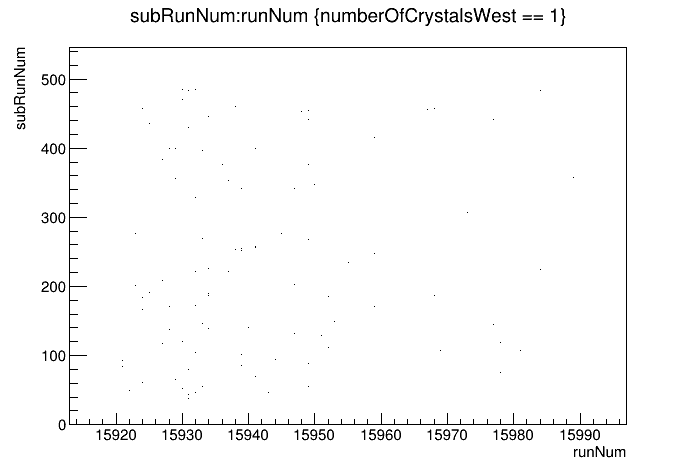

In [8]:
c = r.TCanvas()
tcomp.Draw("subRunNum:runNum","numberOfCrystalsWest == 1","")
c.Draw()

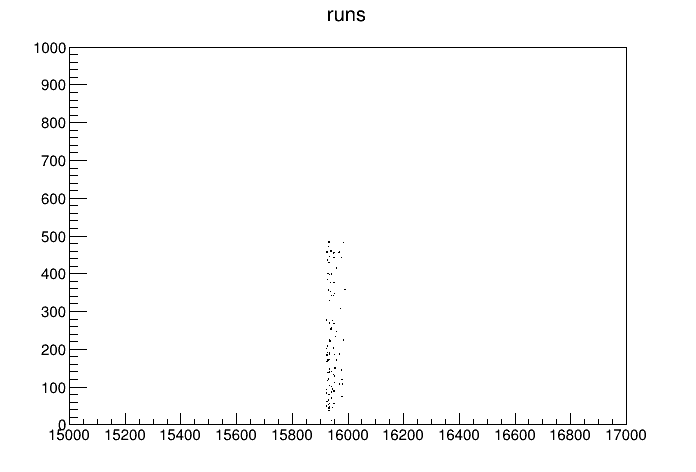

In [9]:
c = r.TCanvas()
minrun = 15000
maxrun = 17000
hruns = r.TH2S("hruns","runs",maxrun-minrun,minrun,maxrun,1000,0,1000)
tcomp.Draw("subRunNum:runNum>>hruns","numberOfCrystalsWest == 1","goff")
hruns.Draw()
c.Draw()

In [10]:
runsAndSubruns = []
for i in range(hruns.GetNbinsX()):
    for j in range(hruns.GetNbinsY()):
        if( hruns.GetBinContent(i, j) != 0):
            runsAndSubruns.append( (int(np.floor(hruns.GetXaxis().GetBinCenter(i))), int(np.floor(hruns.GetYaxis().GetBinCenter(j)))) )       
print(runsAndSubruns)

runs,subRuns = zip(*runsAndSubruns)

[(15921, 84), (15921, 93), (15922, 49), (15923, 202), (15923, 277), (15924, 61), (15924, 167), (15924, 184), (15924, 457), (15925, 191), (15925, 436), (15927, 117), (15927, 208), (15927, 384), (15928, 138), (15928, 171), (15928, 400), (15929, 65), (15929, 356), (15929, 400), (15930, 53), (15930, 121), (15930, 471), (15930, 485), (15931, 38), (15931, 44), (15931, 80), (15931, 430), (15931, 483), (15932, 47), (15932, 104), (15932, 173), (15932, 221), (15932, 329), (15932, 485), (15933, 56), (15933, 147), (15933, 269), (15933, 397), (15934, 139), (15934, 187), (15934, 190), (15934, 226), (15934, 446), (15936, 377), (15937, 0), (15937, 221), (15937, 353), (15938, 253), (15938, 460), (15939, 86), (15939, 101), (15939, 252), (15939, 255), (15939, 342), (15940, 11), (15940, 141), (15941, 70), (15941, 256), (15941, 258), (15941, 399), (15943, 46), (15944, 94), (15945, 276), (15947, 132), (15947, 203), (15947, 342), (15948, 453), (15949, 56), (15949, 89), (15949, 268), (15949, 376), (15949, 442

In [11]:
hall = r.TH1D("hi","Energies in Recon West Clusters with Various n_{hit} Values; Energy [MeV]",400,0,4000)
tcomp.Draw("energyWest>>hi","","goff")

4549451

In [12]:
h2 = r.TH1D("h2","Energies [nhit = 1]; E [MeV]",400,0,4000)
tcomp.Draw("energyWest>>h2","numberOfCrystalsWest == 1","goff")

512156

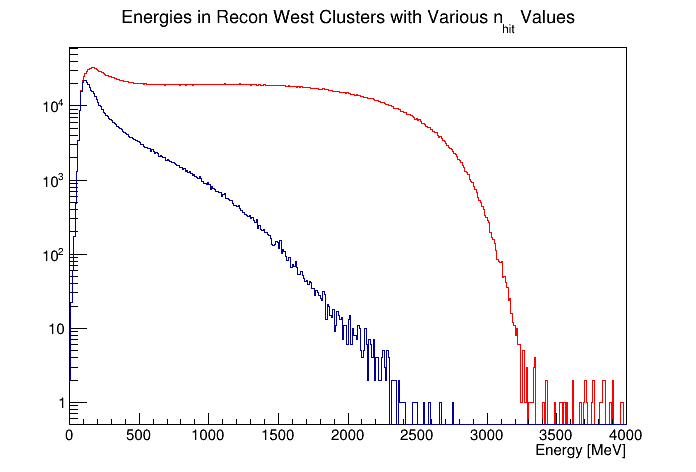

In [13]:
c = r.TCanvas()
hall.SetLineColor(2)
hall.Draw()
h2.Draw("SAME")
c.SetLogy()
c.Draw()

In [60]:
energyVec = []
for i in range(1,16):
    hi = r.TH1D("hi","Energies in Recon West Clusters with n_{hit} = "+str(i)+"; Energy [MeV]",400,0,4000)
    tcomp.Draw("energyWest>>hi","numberOfCrystalsWest == "+str(i),"goff")
    energyVec.append( hi.Clone("h"+str(i)) )

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

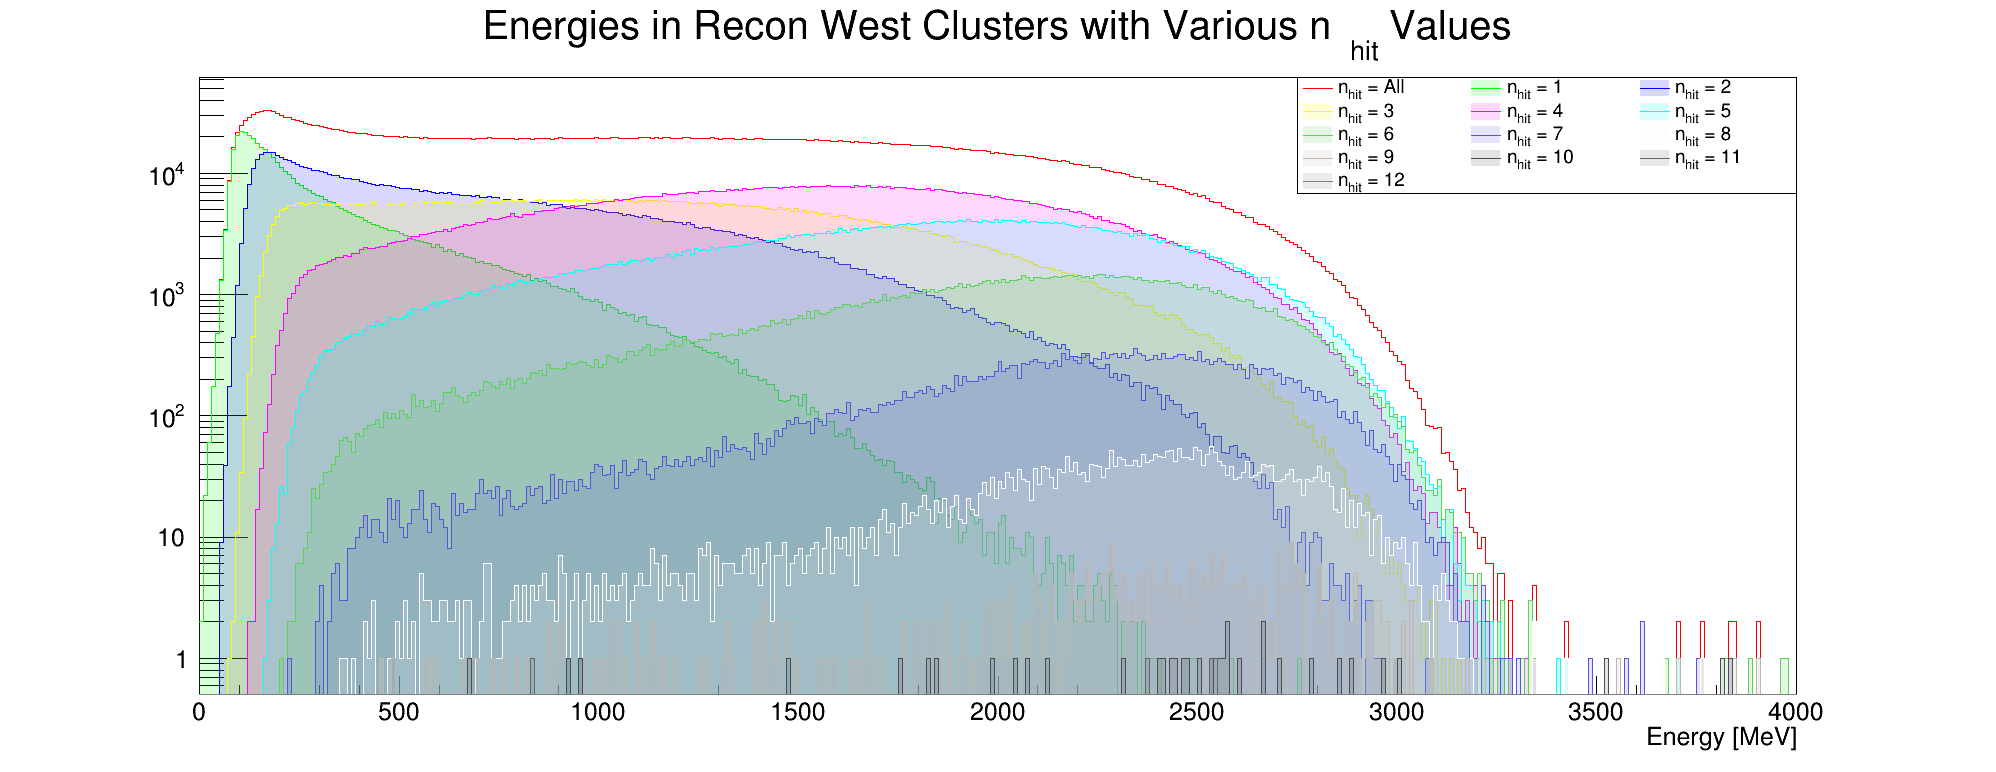

In [61]:
c = r.TCanvas("c","c",2000,800)
hall.SetLineColor(2)
hall.Draw()

leg = r.TLegend(0.65,0.75,0.9,0.9)
leg.SetNColumns(3)
leg.AddEntry(hall,"n_{hit} = All","fl")

for i, hi in enumerate(energyVec):
    if(hi.GetEntries() > 0):
        hi.SetLineColor(i+3)
        hi.SetFillColorAlpha(i+3,0.15)
        hi.Draw("SAME")
        leg.AddEntry(hi,"n_{hit} = "+str(i+1),"fl")
c.SetLogy()

leg.Draw()
c.Draw()

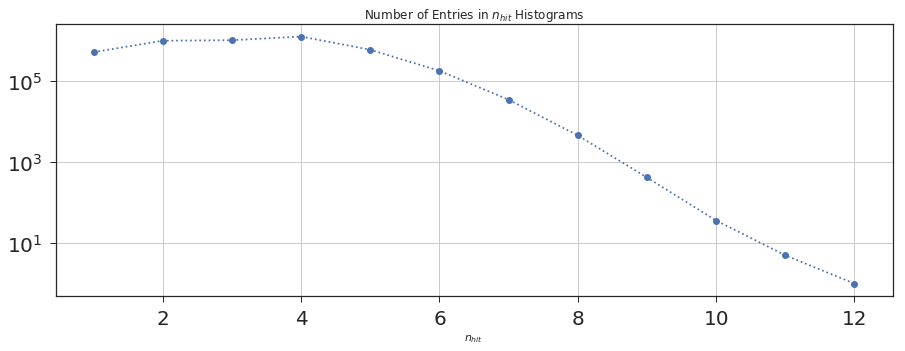

In [62]:
nvec = []

for i, hi in enumerate(energyVec):
    #print(hi.GetEntries())
    if(hi.GetEntries()>0):
        nvec.append(hi.GetEntries())
    
    
plt.subplots(figsize=(15,5))
plt.plot([i+1 for i in range(len(nvec))],nvec,'o:')
plt.title(r"Number of Entries in $n_{hit}$ Histograms")
plt.xlabel(r"$n_{hit}$")
plt.yscale('log')
plt.grid()
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


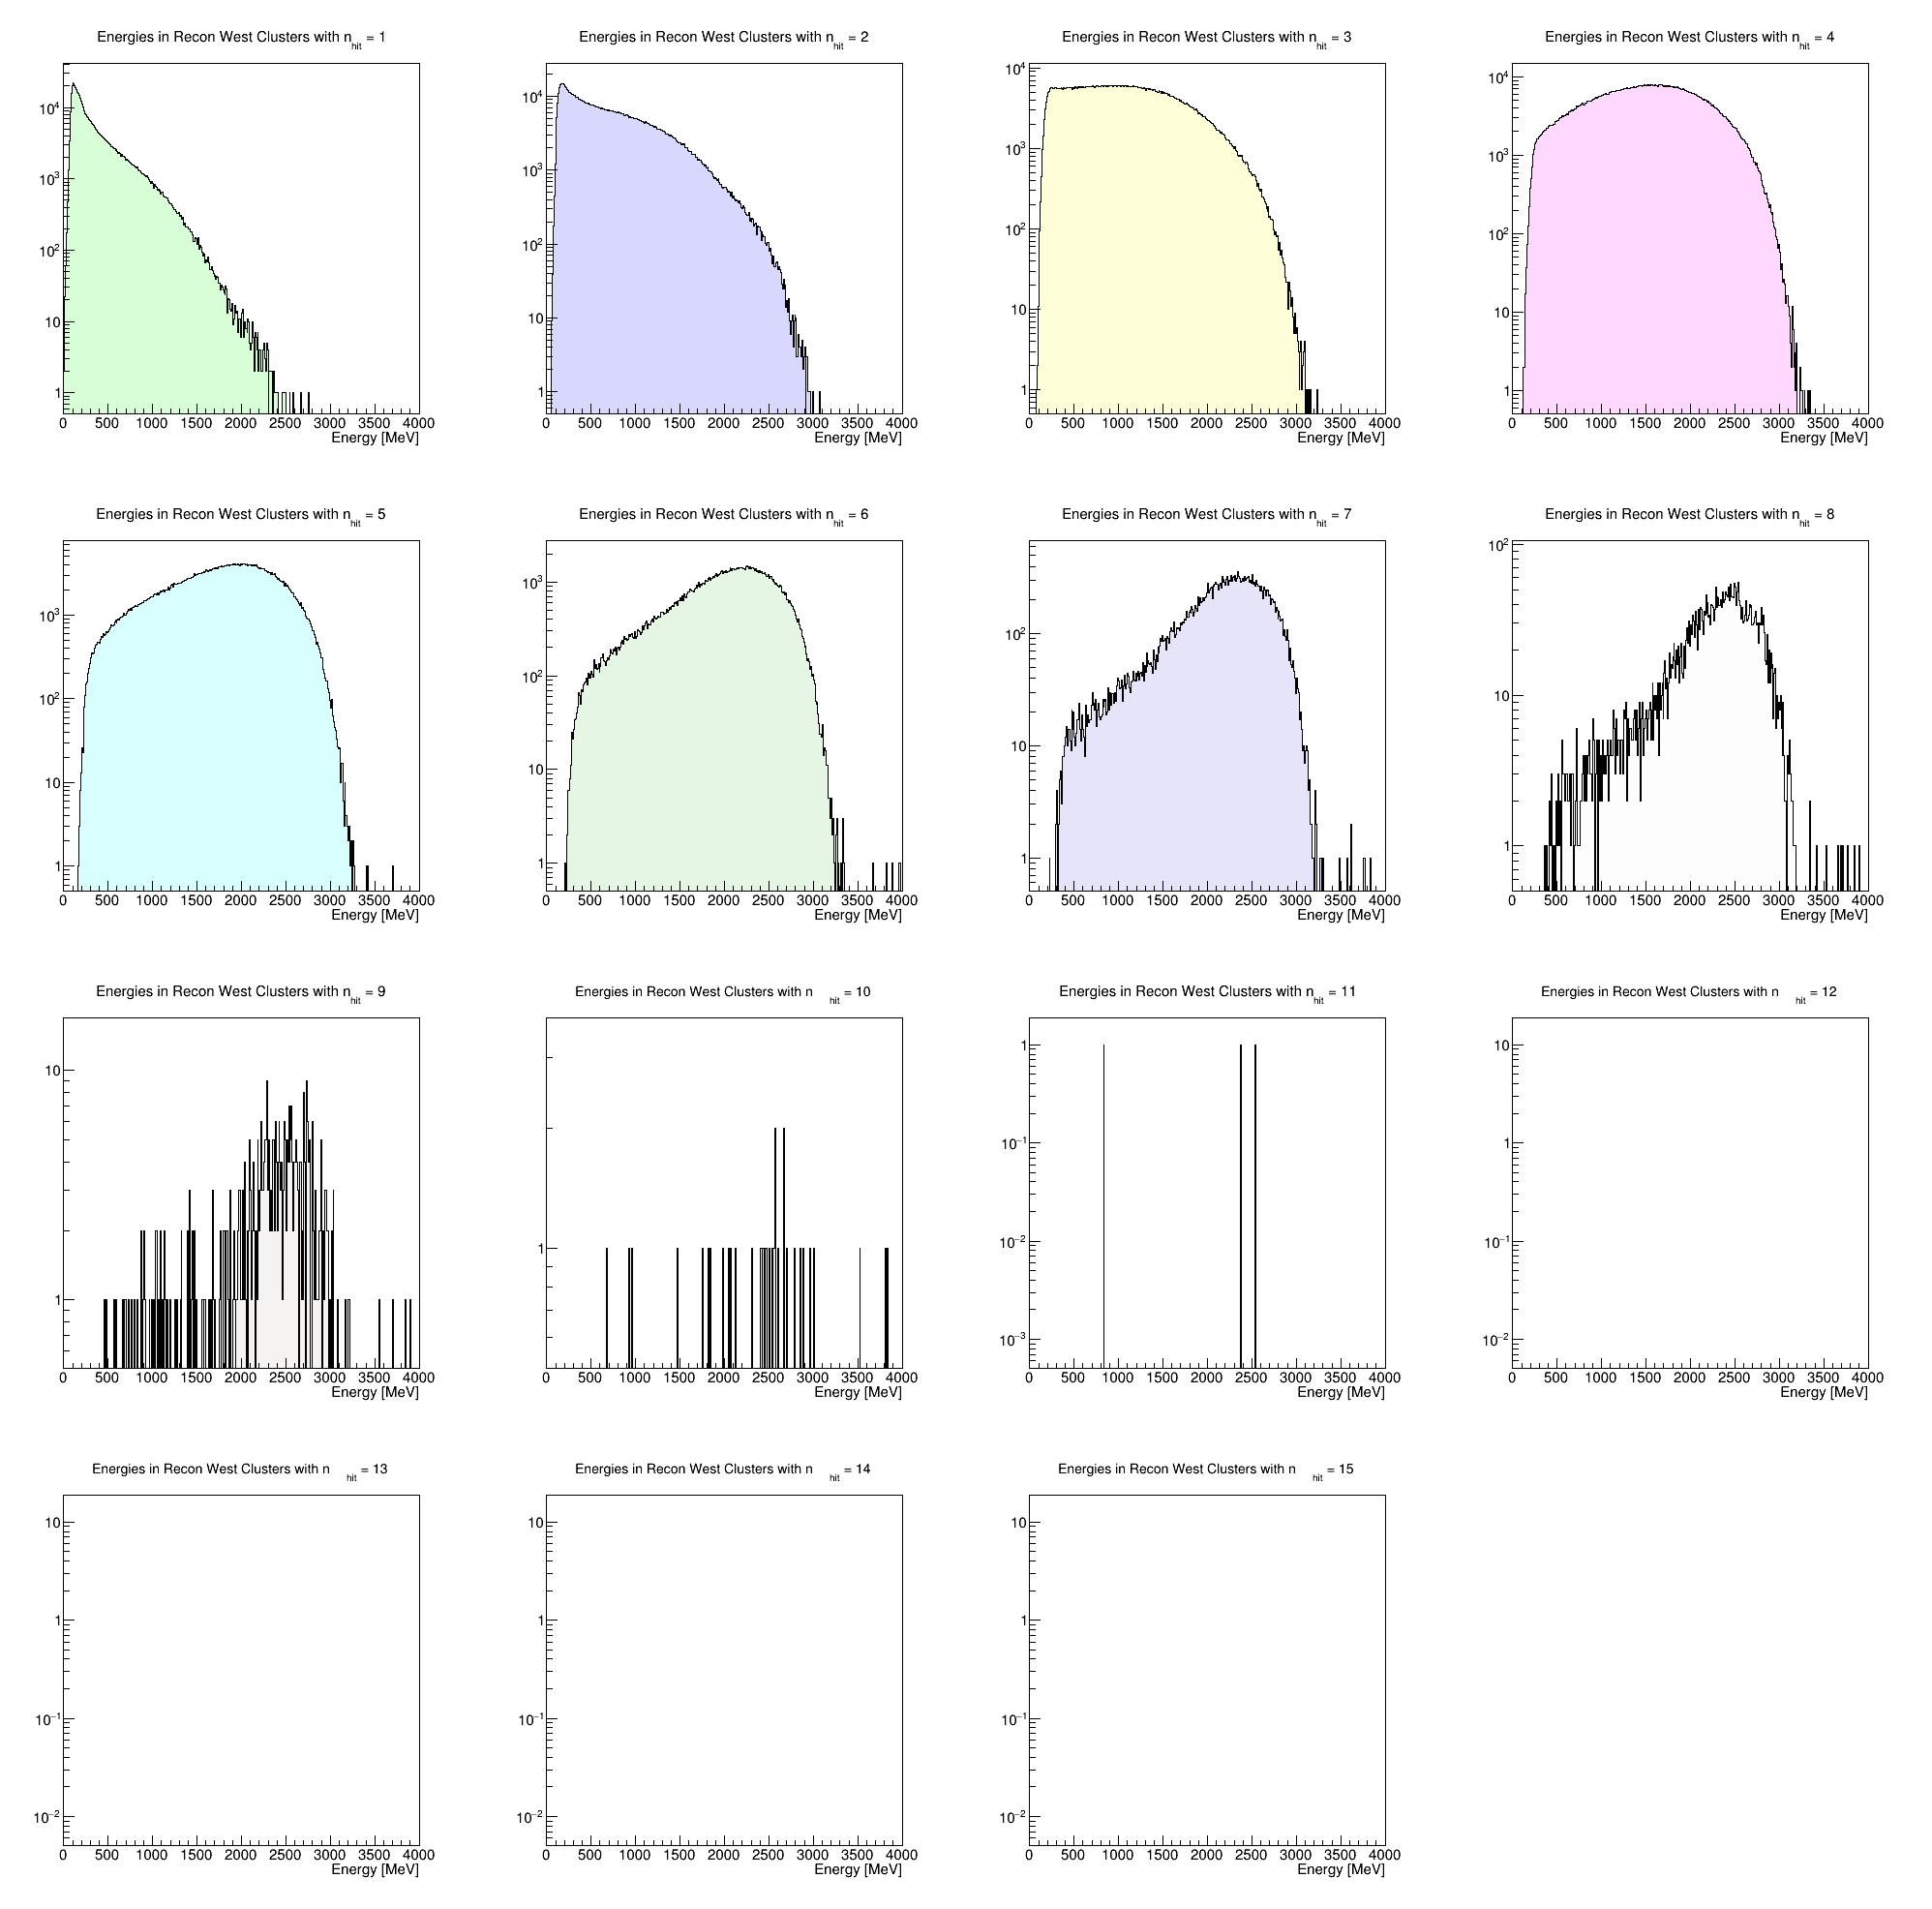

In [63]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(energyVec)/4)))

for i, hi in enumerate(energyVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(i+3,0.15)
    hi.Draw("SAME")
    r.gPad.SetLogy()

c.Draw()

In [ ]:
energyVecEast = []
for i in range(1,16):
    hi = r.TH1D("hi","Energies in Recon East Clusters with n_{hit} = "+str(i)+"; Energy [MeV]",400,0,4000)
    tcomp.Draw("energyEast>>hi","numberOfCrystalsWest == "+str(i),"goff")
    energyVecEast.append( hi.Clone("h"+str(i)) )

West: Red
East: Blue


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


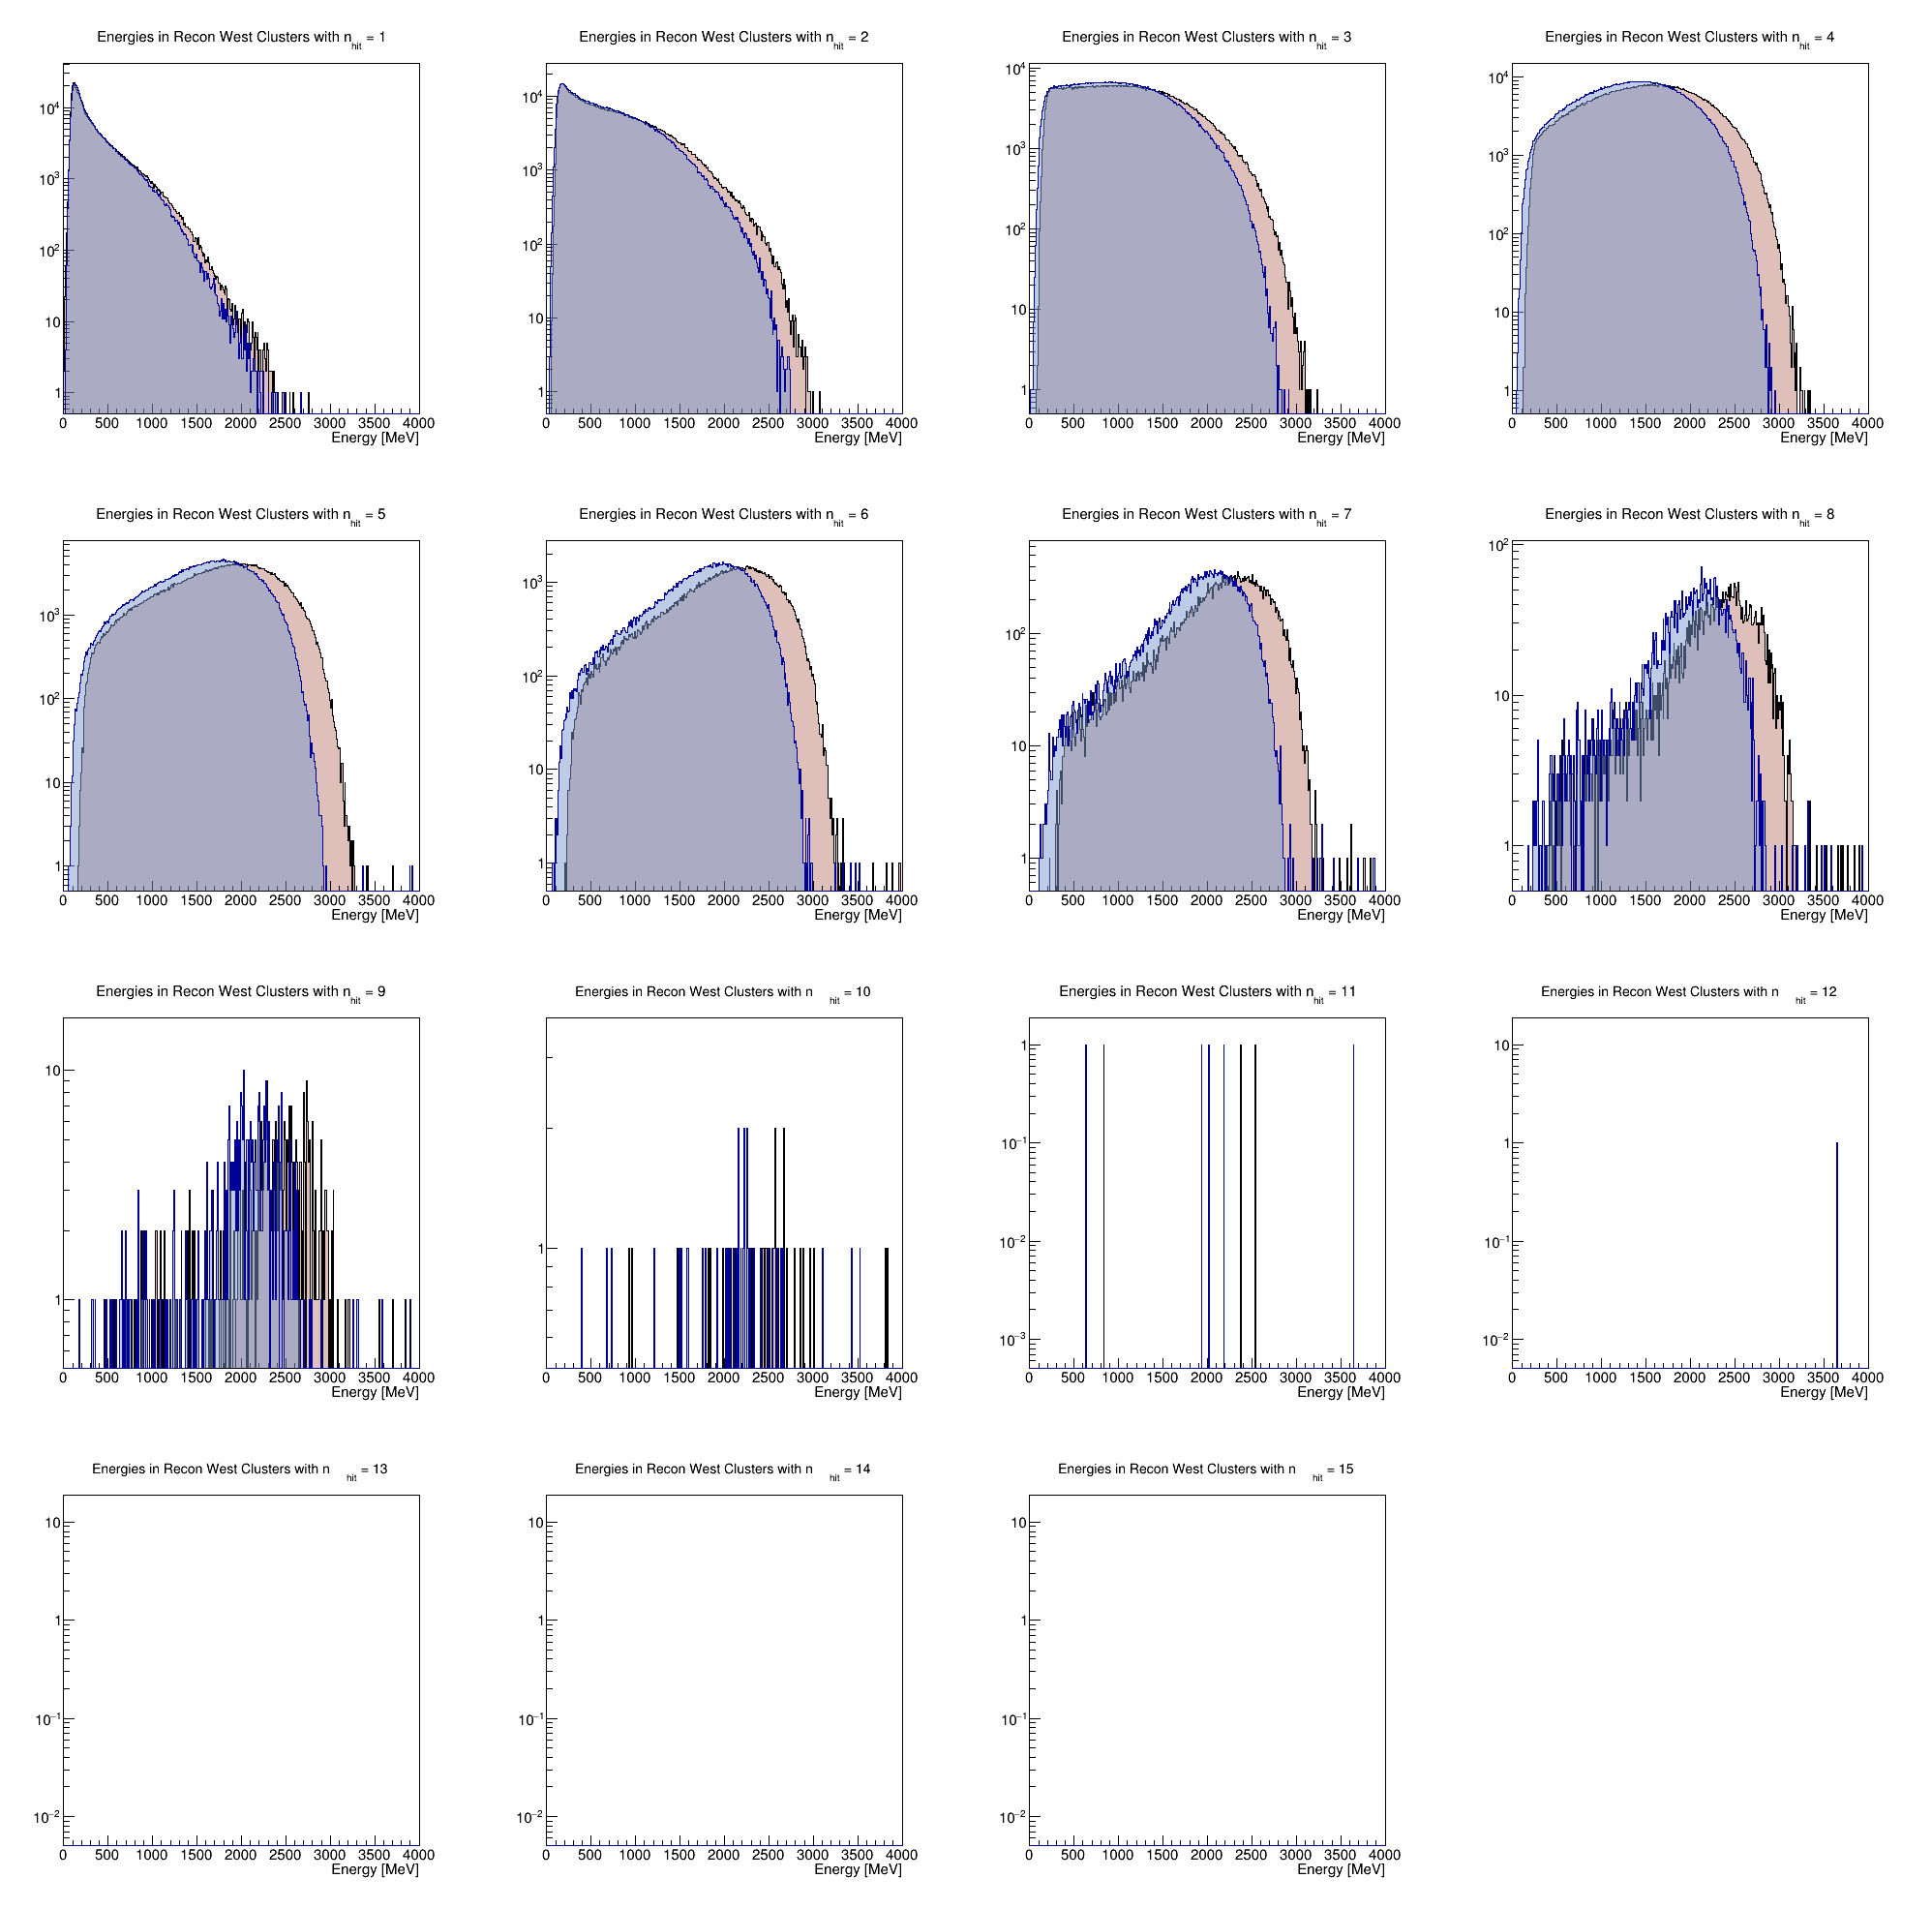

In [56]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(energyVec)/4)))

for i, hi in enumerate(energyVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(45,0.5)
    hi.Draw()
    
    energyVecEast[i].Draw("SAME")
    energyVecEast[i].SetFillColorAlpha(38,0.5)
    
    r.gPad.SetLogy()

c.Draw()

print("West: Red")
print("East: Blue")

In [50]:
timeVec = []
for i in range(1,16):
    hi = r.TH1D("hi","Times of Recon West Clusters with n_{hit} = "+str(i)+"; Time [#mus]",700,0,700)
    tcomp.Draw("timeWest/1000*1.25>>hi","numberOfCrystalsWest == "+str(i),"goff")
    timeVec.append( hi.Clone("h"+str(i)) )

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


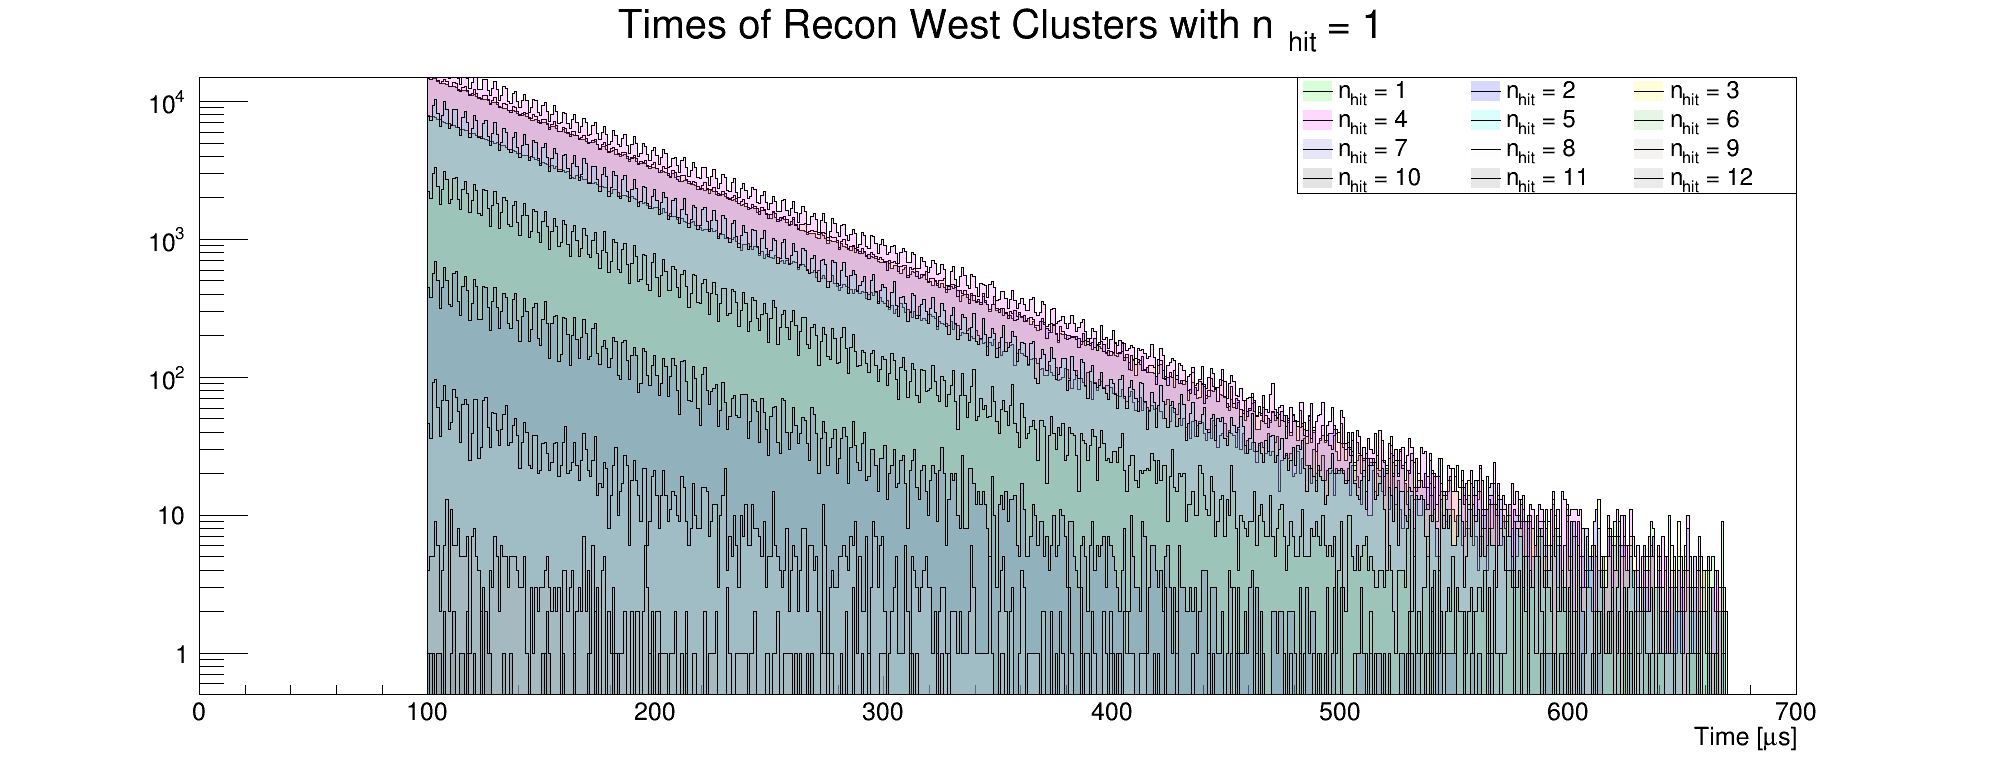

In [51]:
c = r.TCanvas("c","c",2000,800)
hall.SetLineColor(2)
hall.Draw()

leg = r.TLegend(0.65,0.75,0.9,0.9)
leg.SetNColumns(3)

for i, hi in enumerate(timeVec):
    if(hi.GetEntries() > 0):
        hi.SetLineColor(1)
        hi.SetFillColorAlpha(i+3,0.15)
        if(i>0.5):
            hi.Draw("SAME")
        else:
            hi.Draw()
        leg.AddEntry(hi,"n_{hit} = "+str(i+1),"fl")
c.SetLogy()

leg.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


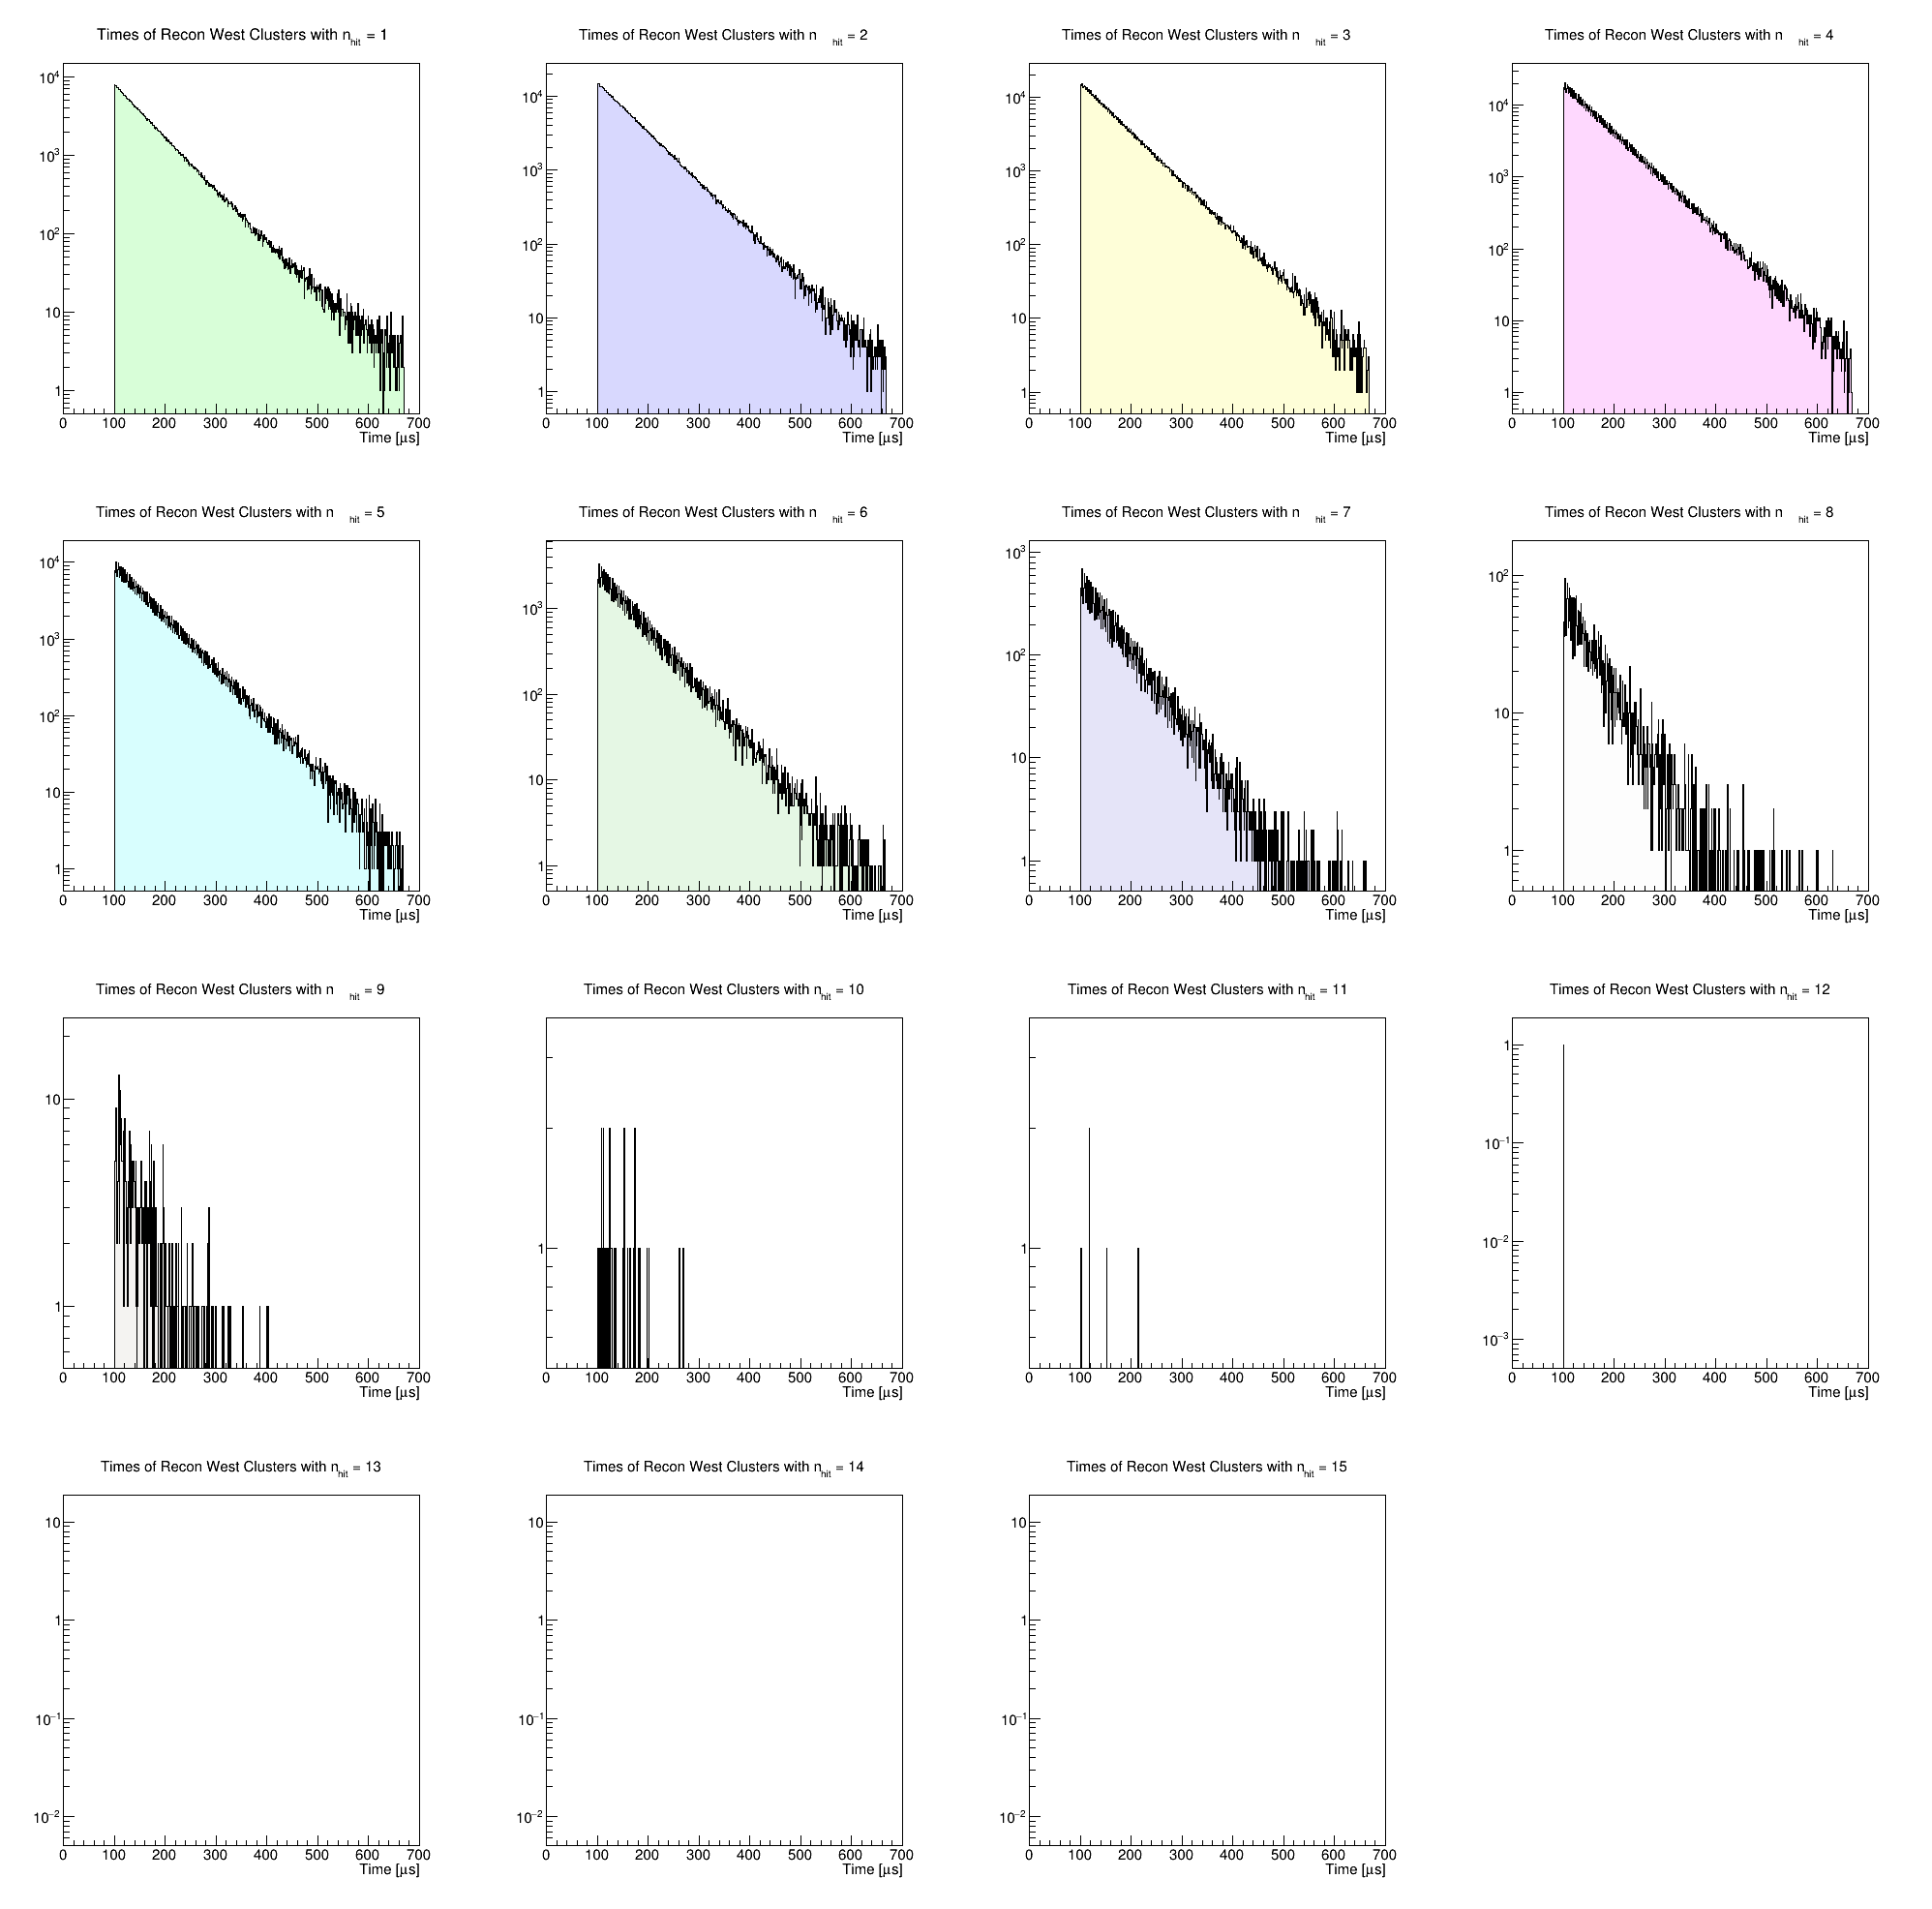

In [52]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(timeVec)/4)))

for i, hi in enumerate(timeVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(i+3,0.15)
    hi.Draw()
    r.gPad.SetLogy()

c.Draw()

In [53]:
posVec = []
for i in range(1,16):
    hi = r.TH2D("hi","Positions of Recon West Clusters with n_{hit} = "+str(i)+"; x [xtals]; y [xtals]",90,0,9,60,0,6)
    tcomp.Draw("positionWest.second:positionWest.first>>hi","numberOfCrystalsWest == "+str(i),"goff")
    posVec.append( hi.Clone("h"+str(i)) )

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


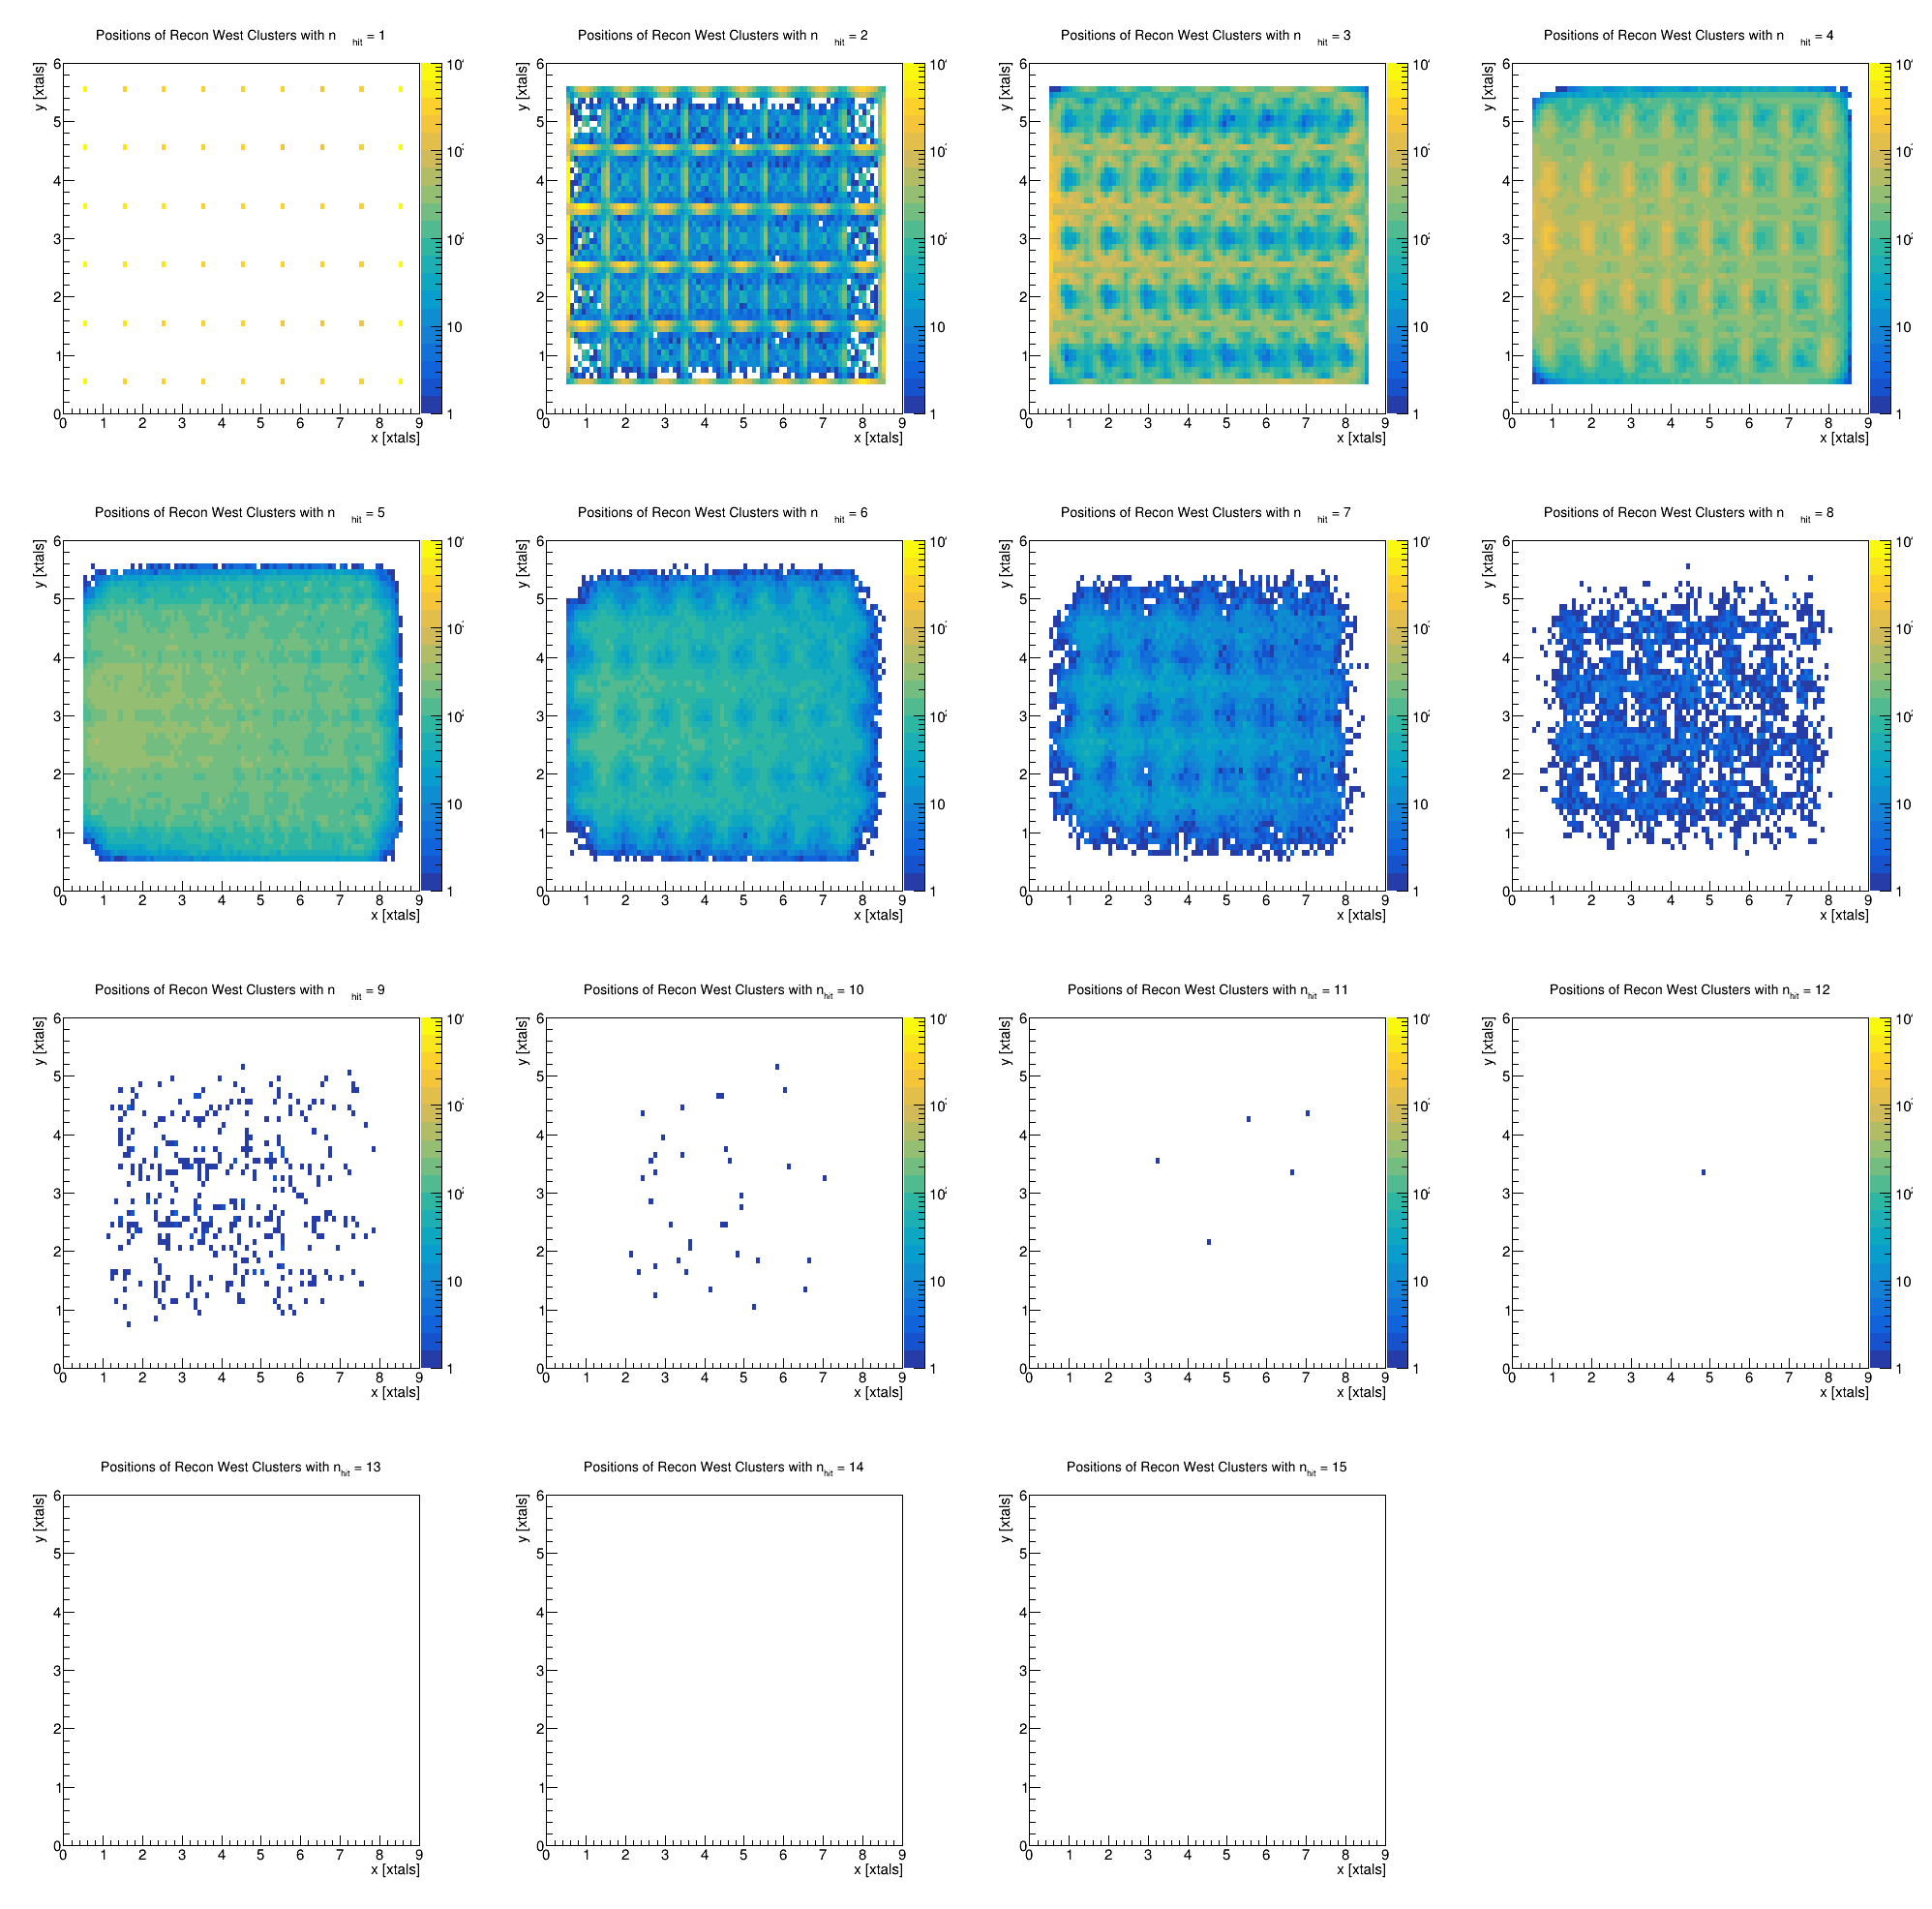

In [69]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(posVec)/4)))

for i, hi in enumerate(posVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(i+3,0.15)
    hi.GetZaxis().SetRangeUser(0,10**4)
    hi.Draw("colz")
    r.gPad.SetLogz()

c.Draw()

In [55]:
deltaTVec = []
for i in range(1,16):
    hi = r.TH1D("hi","#deltat [Corrected] of Recon West Clusters with n_{hit} = "+str(i)+"; #deltat [c.t.]",100,-1.5,1.5)
    tcomp.Draw("deltaT-timeCorr>>hi","numberOfCrystalsWest == "+str(i),"goff")
    deltaTVec.append( hi.Clone("h"+str(i)) )

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


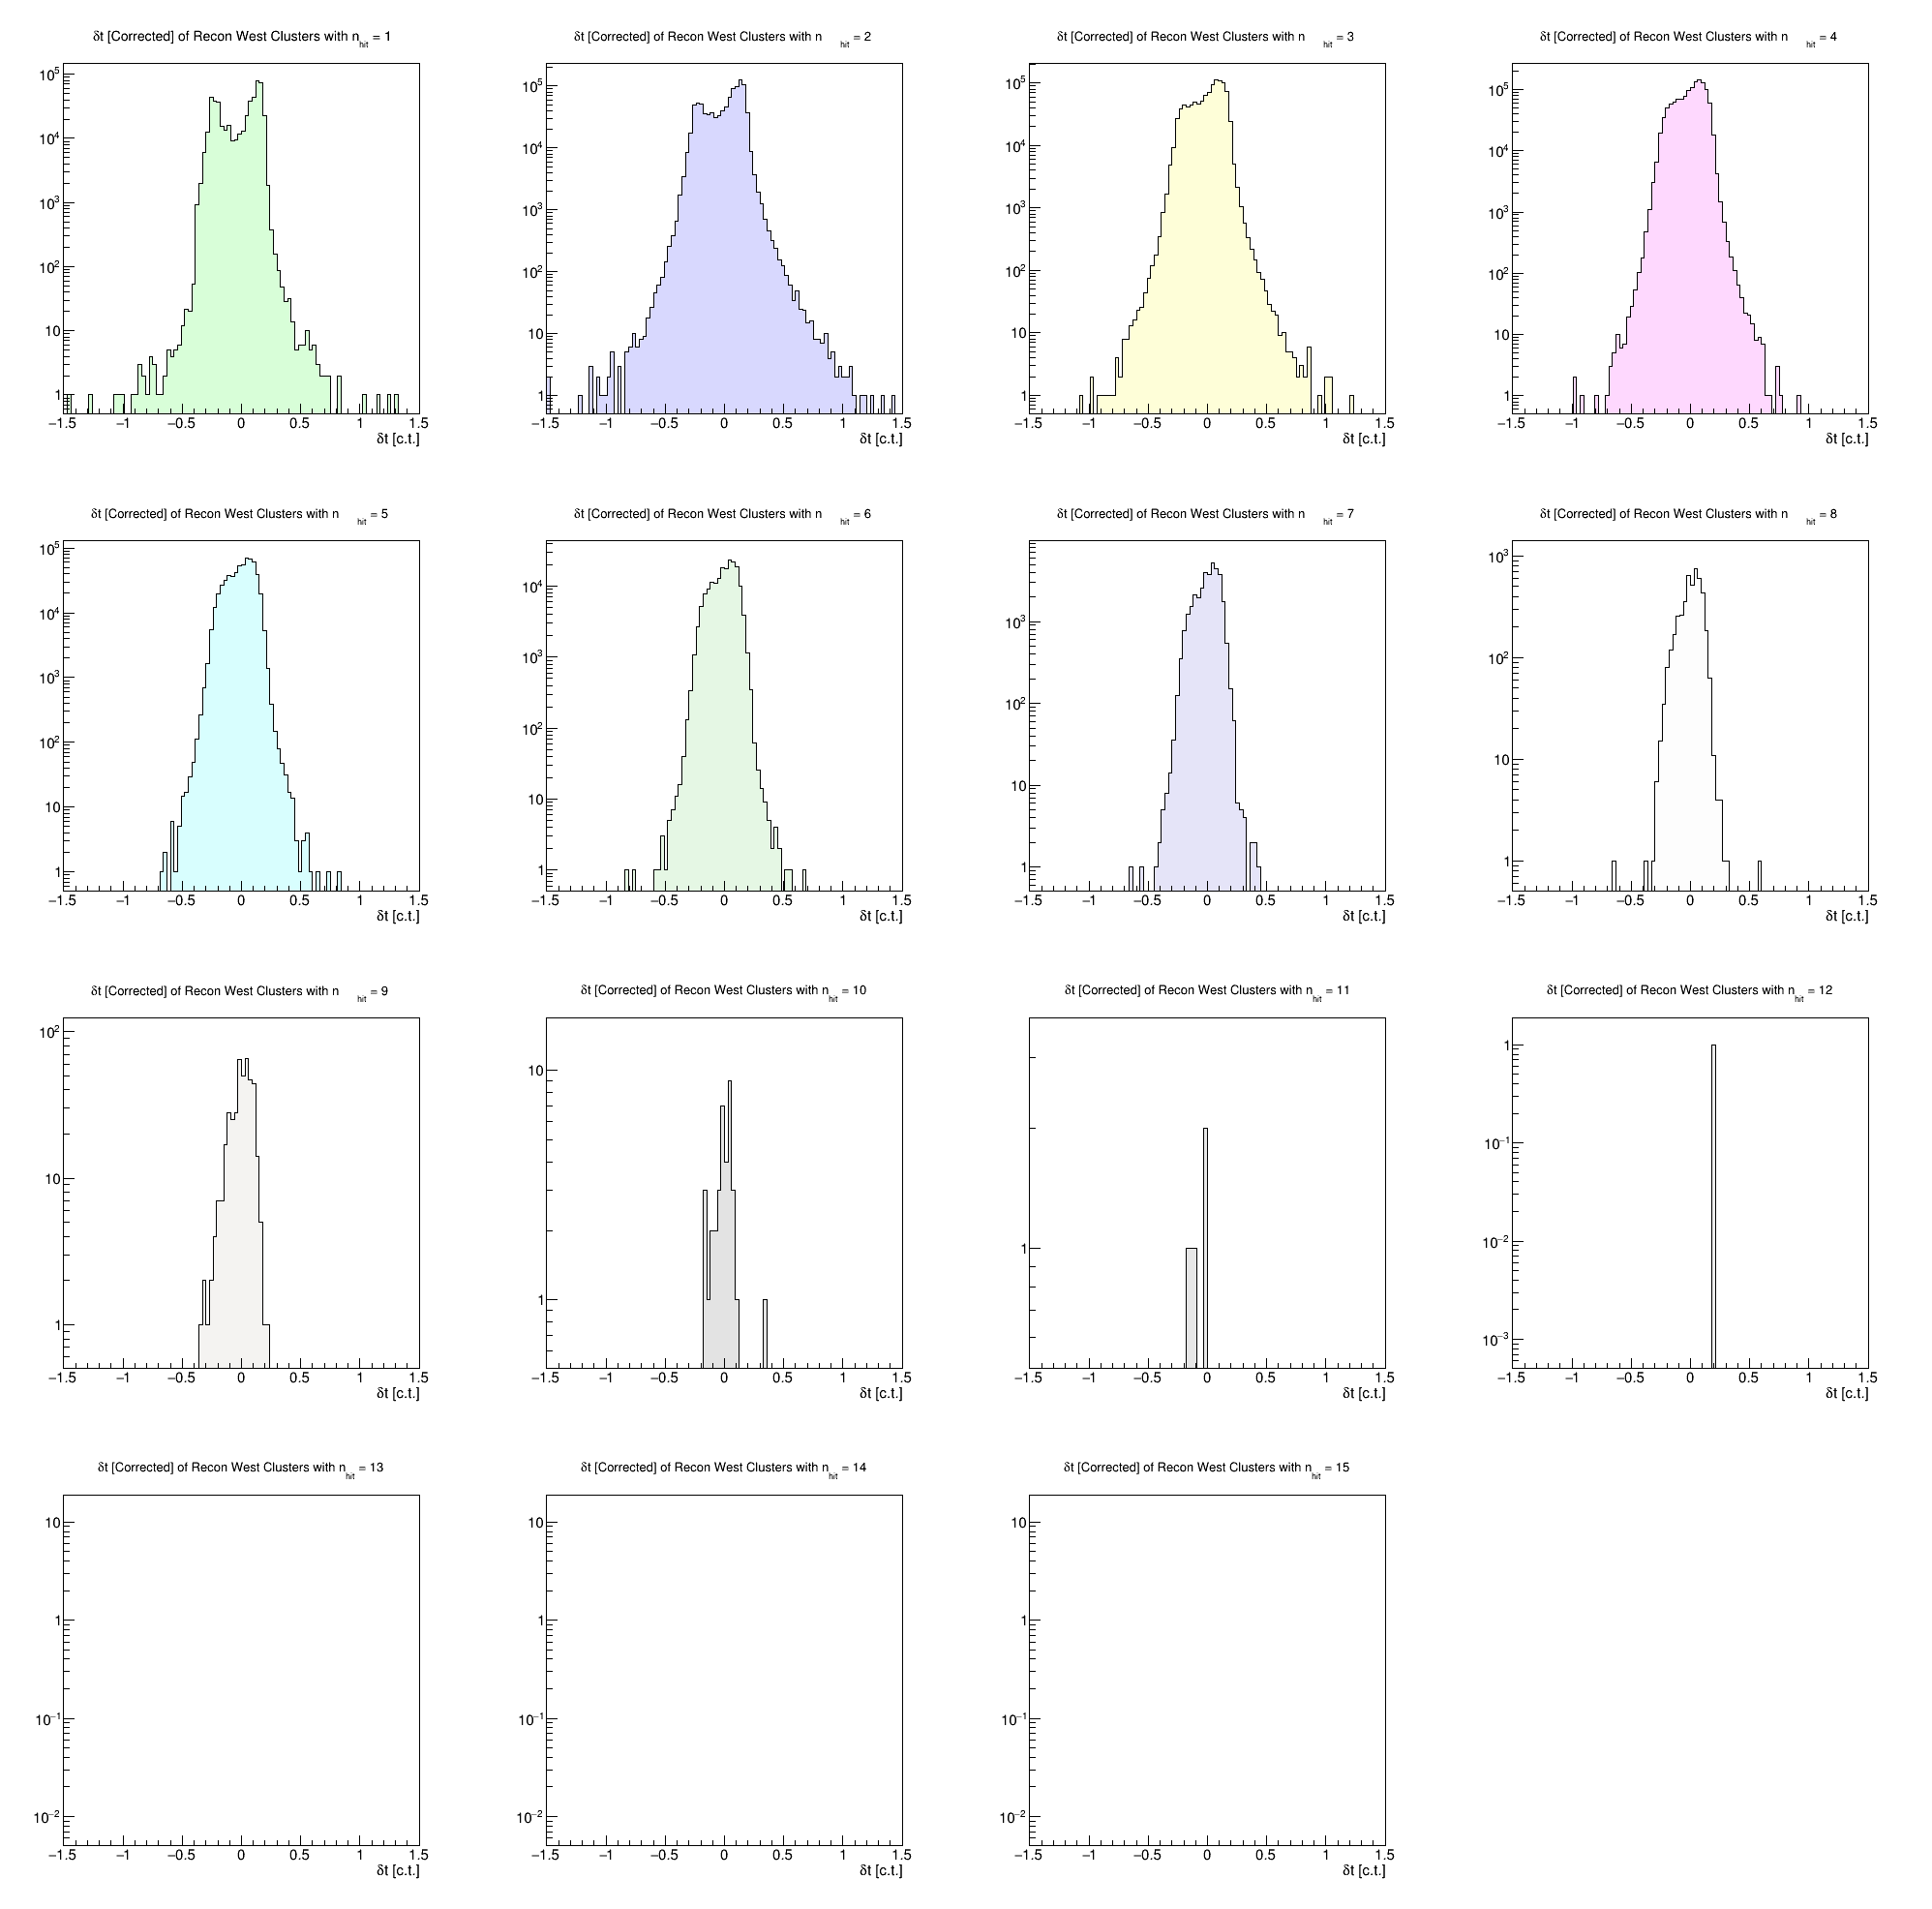

In [56]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(deltaTVec)/4)))

for i, hi in enumerate(deltaTVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(i+3,0.15)
    hi.Draw("colz")
    r.gPad.SetLogy()

c.Draw()

In [57]:
deltaXVec = []
for i in range(1,16):
    hi = r.TH1D("hi","#deltaX of Recon West Clusters with n_{hit} = "+str(i)+"; #deltaX [xtals]",1000,-10,10)
    tcomp.Draw("deltaX>>hi","numberOfCrystalsWest == "+str(i),"goff")
    deltaXVec.append( hi.Clone("h"+str(i)) )

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


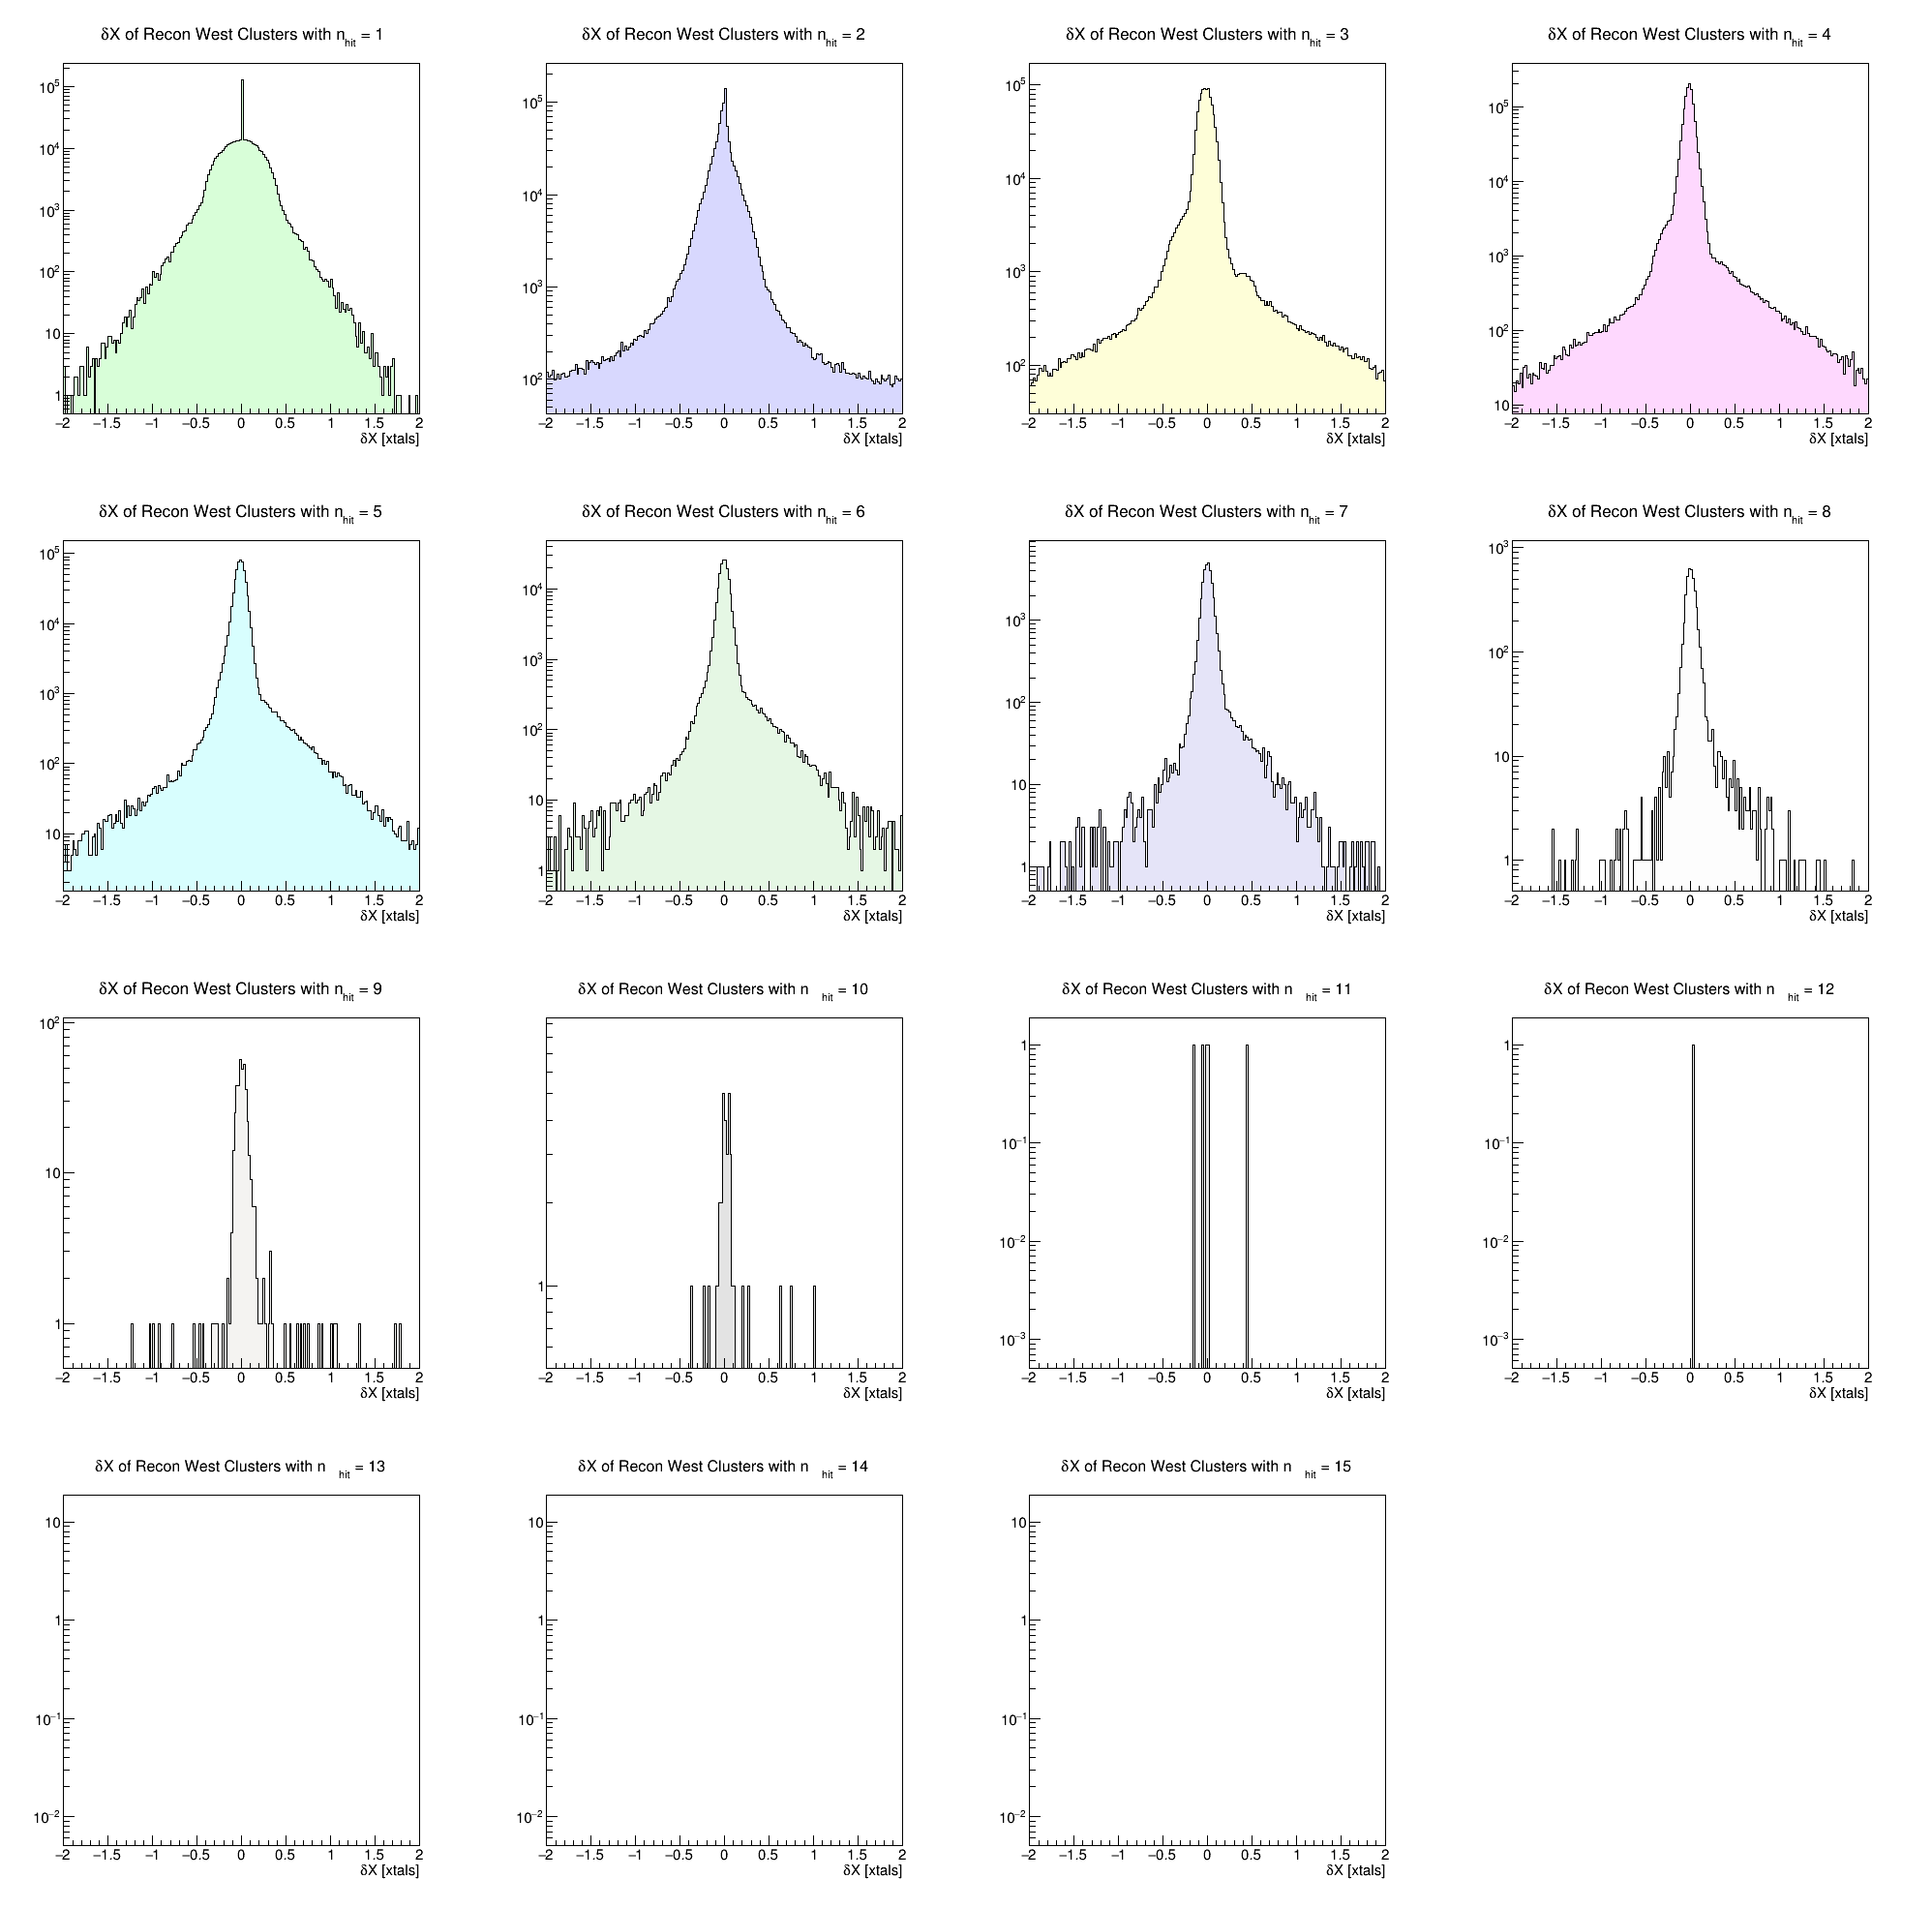

In [58]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(deltaXVec)/4)))

for i, hi in enumerate(deltaXVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(i+3,0.15)
    hi.Draw("colz")
    r.gPad.SetLogy()
    hi.GetXaxis().SetRangeUser(-2,2)

c.Draw()

In [59]:
deltaYVec = []
for i in range(1,16):
    hi = r.TH1D("hi","#deltaY of Recon West Clusters with n_{hit} = "+str(i)+"; #deltaY [xtals]",1000,-10,10)
    tcomp.Draw("deltaY>>hi","numberOfCrystalsWest == "+str(i),"goff")
    deltaYVec.append( hi.Clone("h"+str(i)) )

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


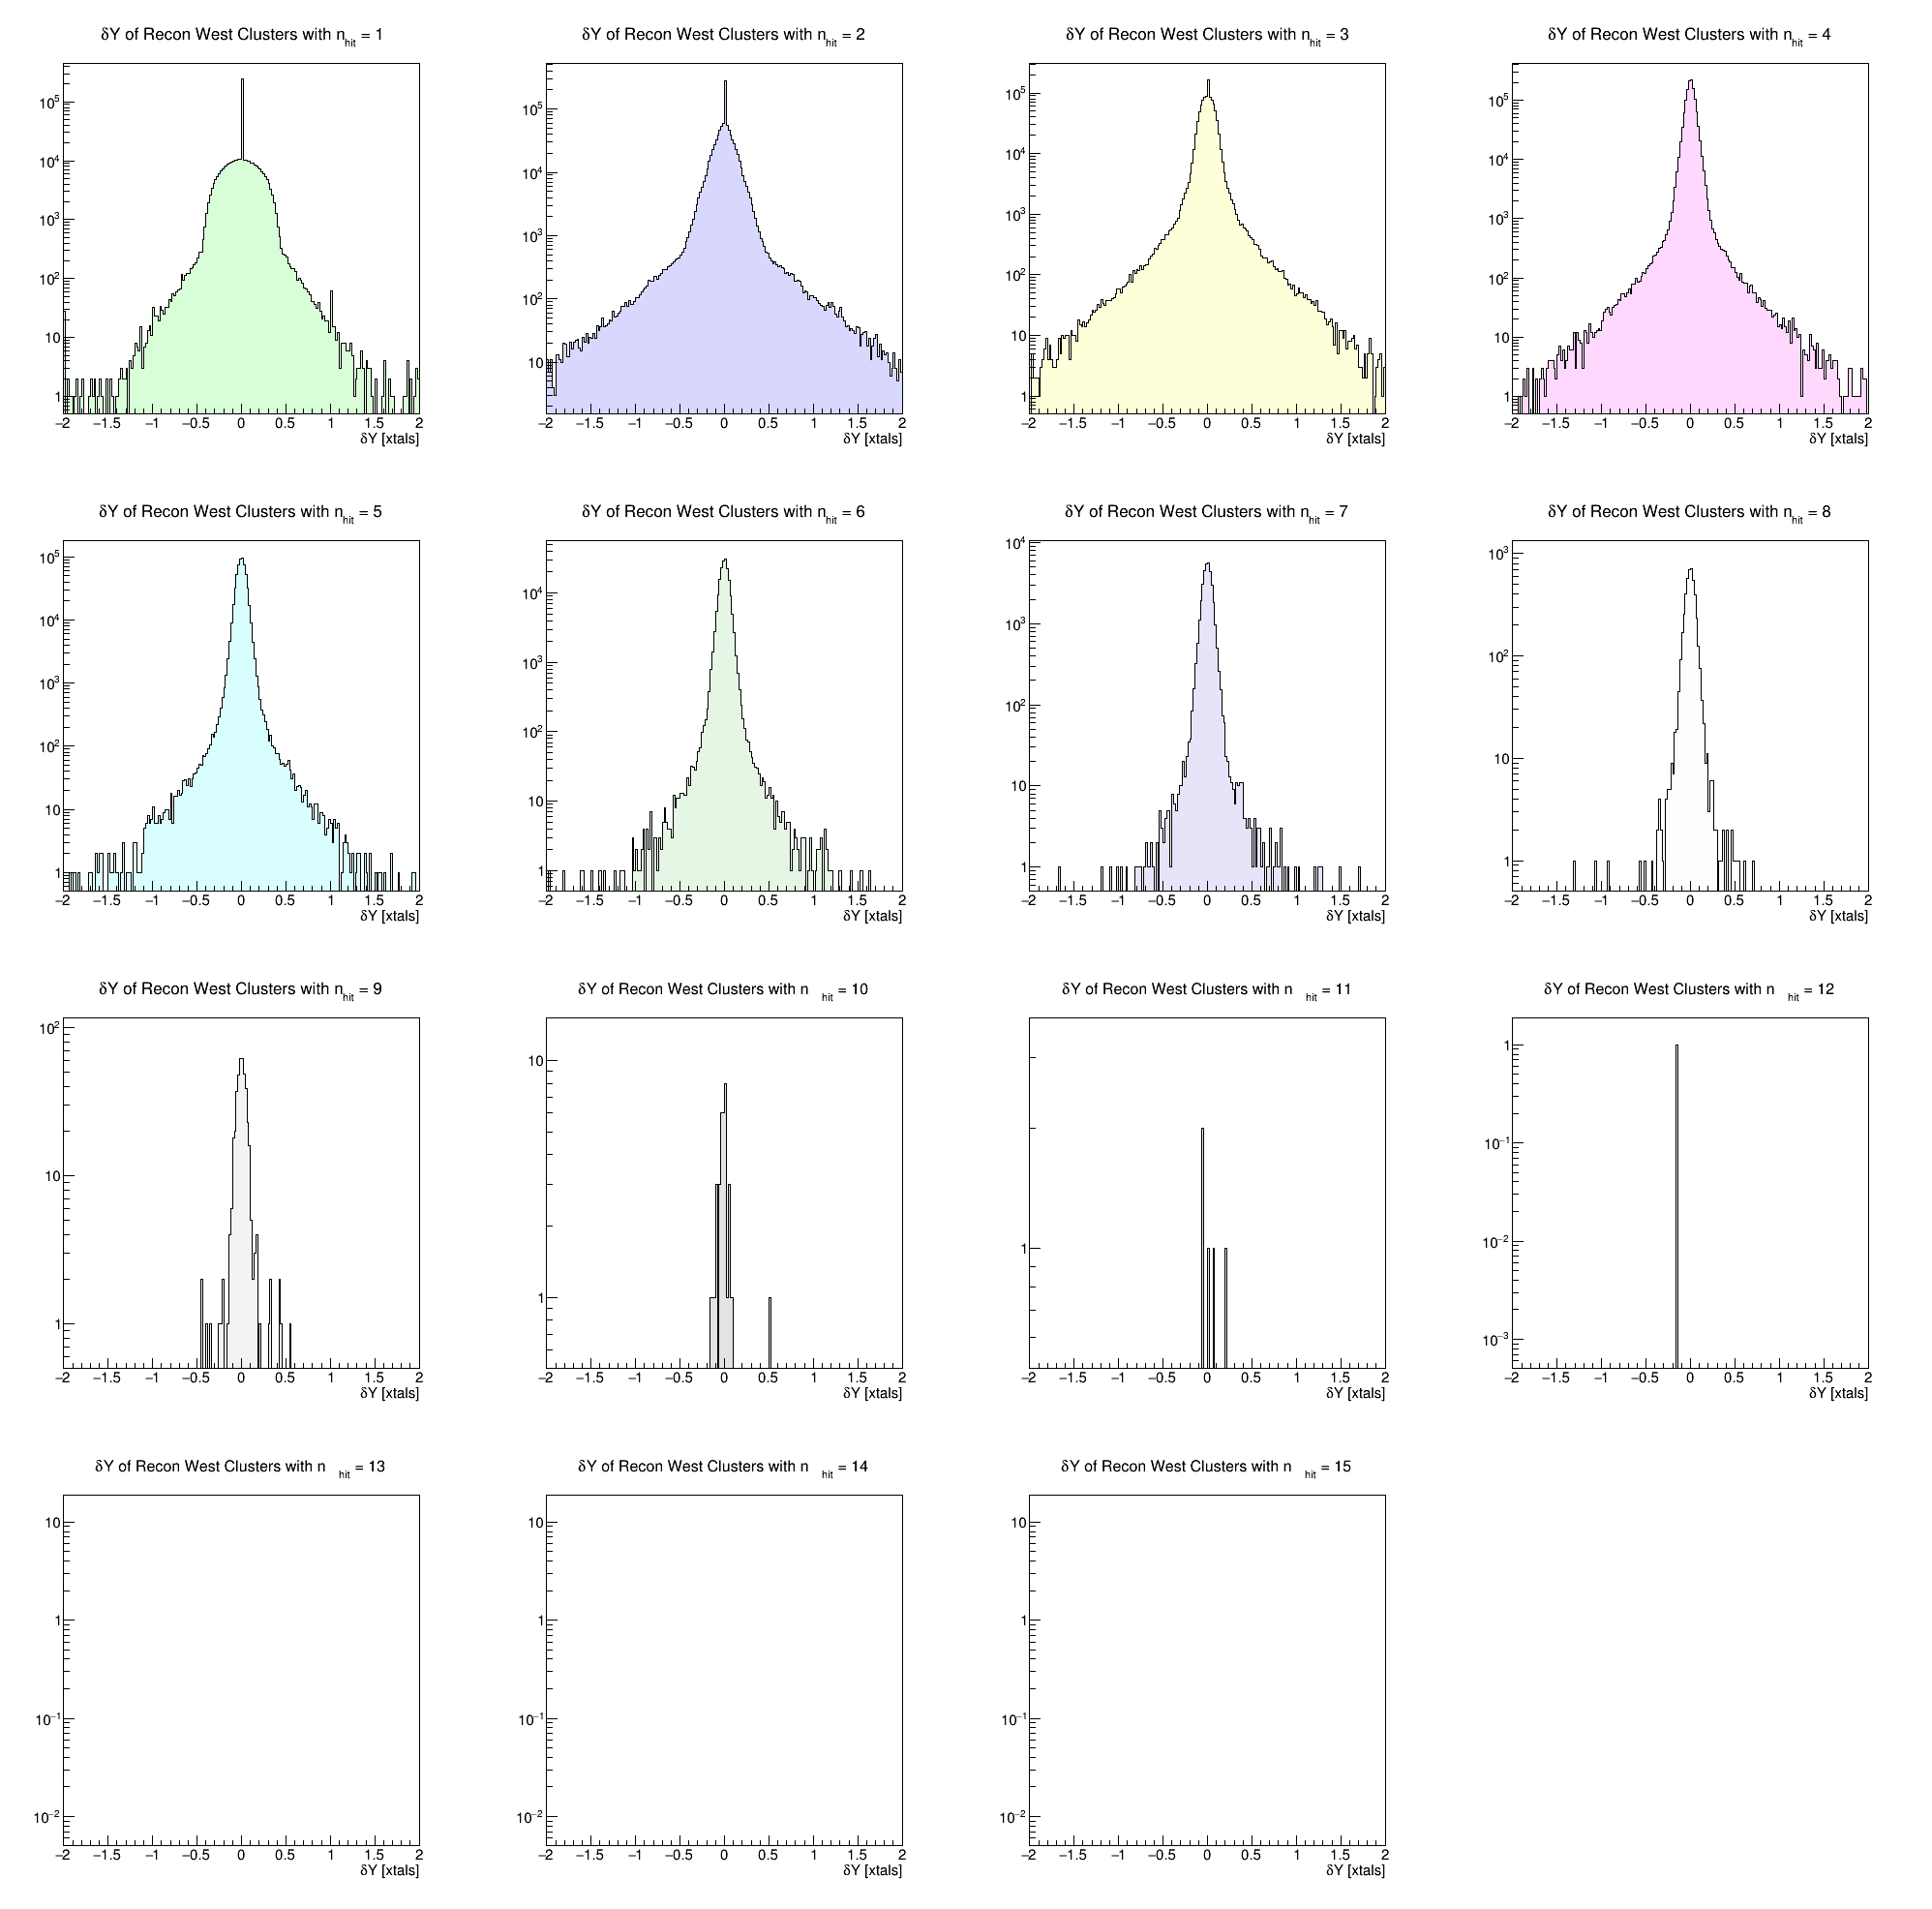

In [60]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(deltaYVec)/4)))

for i, hi in enumerate(deltaYVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(i+3,0.15)
    hi.Draw("colz")
    r.gPad.SetLogy()
    hi.GetXaxis().SetRangeUser(-2,2)

c.Draw()

In [104]:
evwVec = []
for i in range(1,16):
    hi = r.TH2D("hi","Energy EvW of Recon West Clusters with n_{hit} = "+str(i)+"; Energy East [MeV]; Energy West [MeV]"
                ,6000,0,6000,6000,0,6000)
    tcomp.Draw("energyWest:energyEast>>hi","numberOfCrystalsWest == "+str(i),"goff")
    evwVec.append( hi.Clone("h"+str(i)) )

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


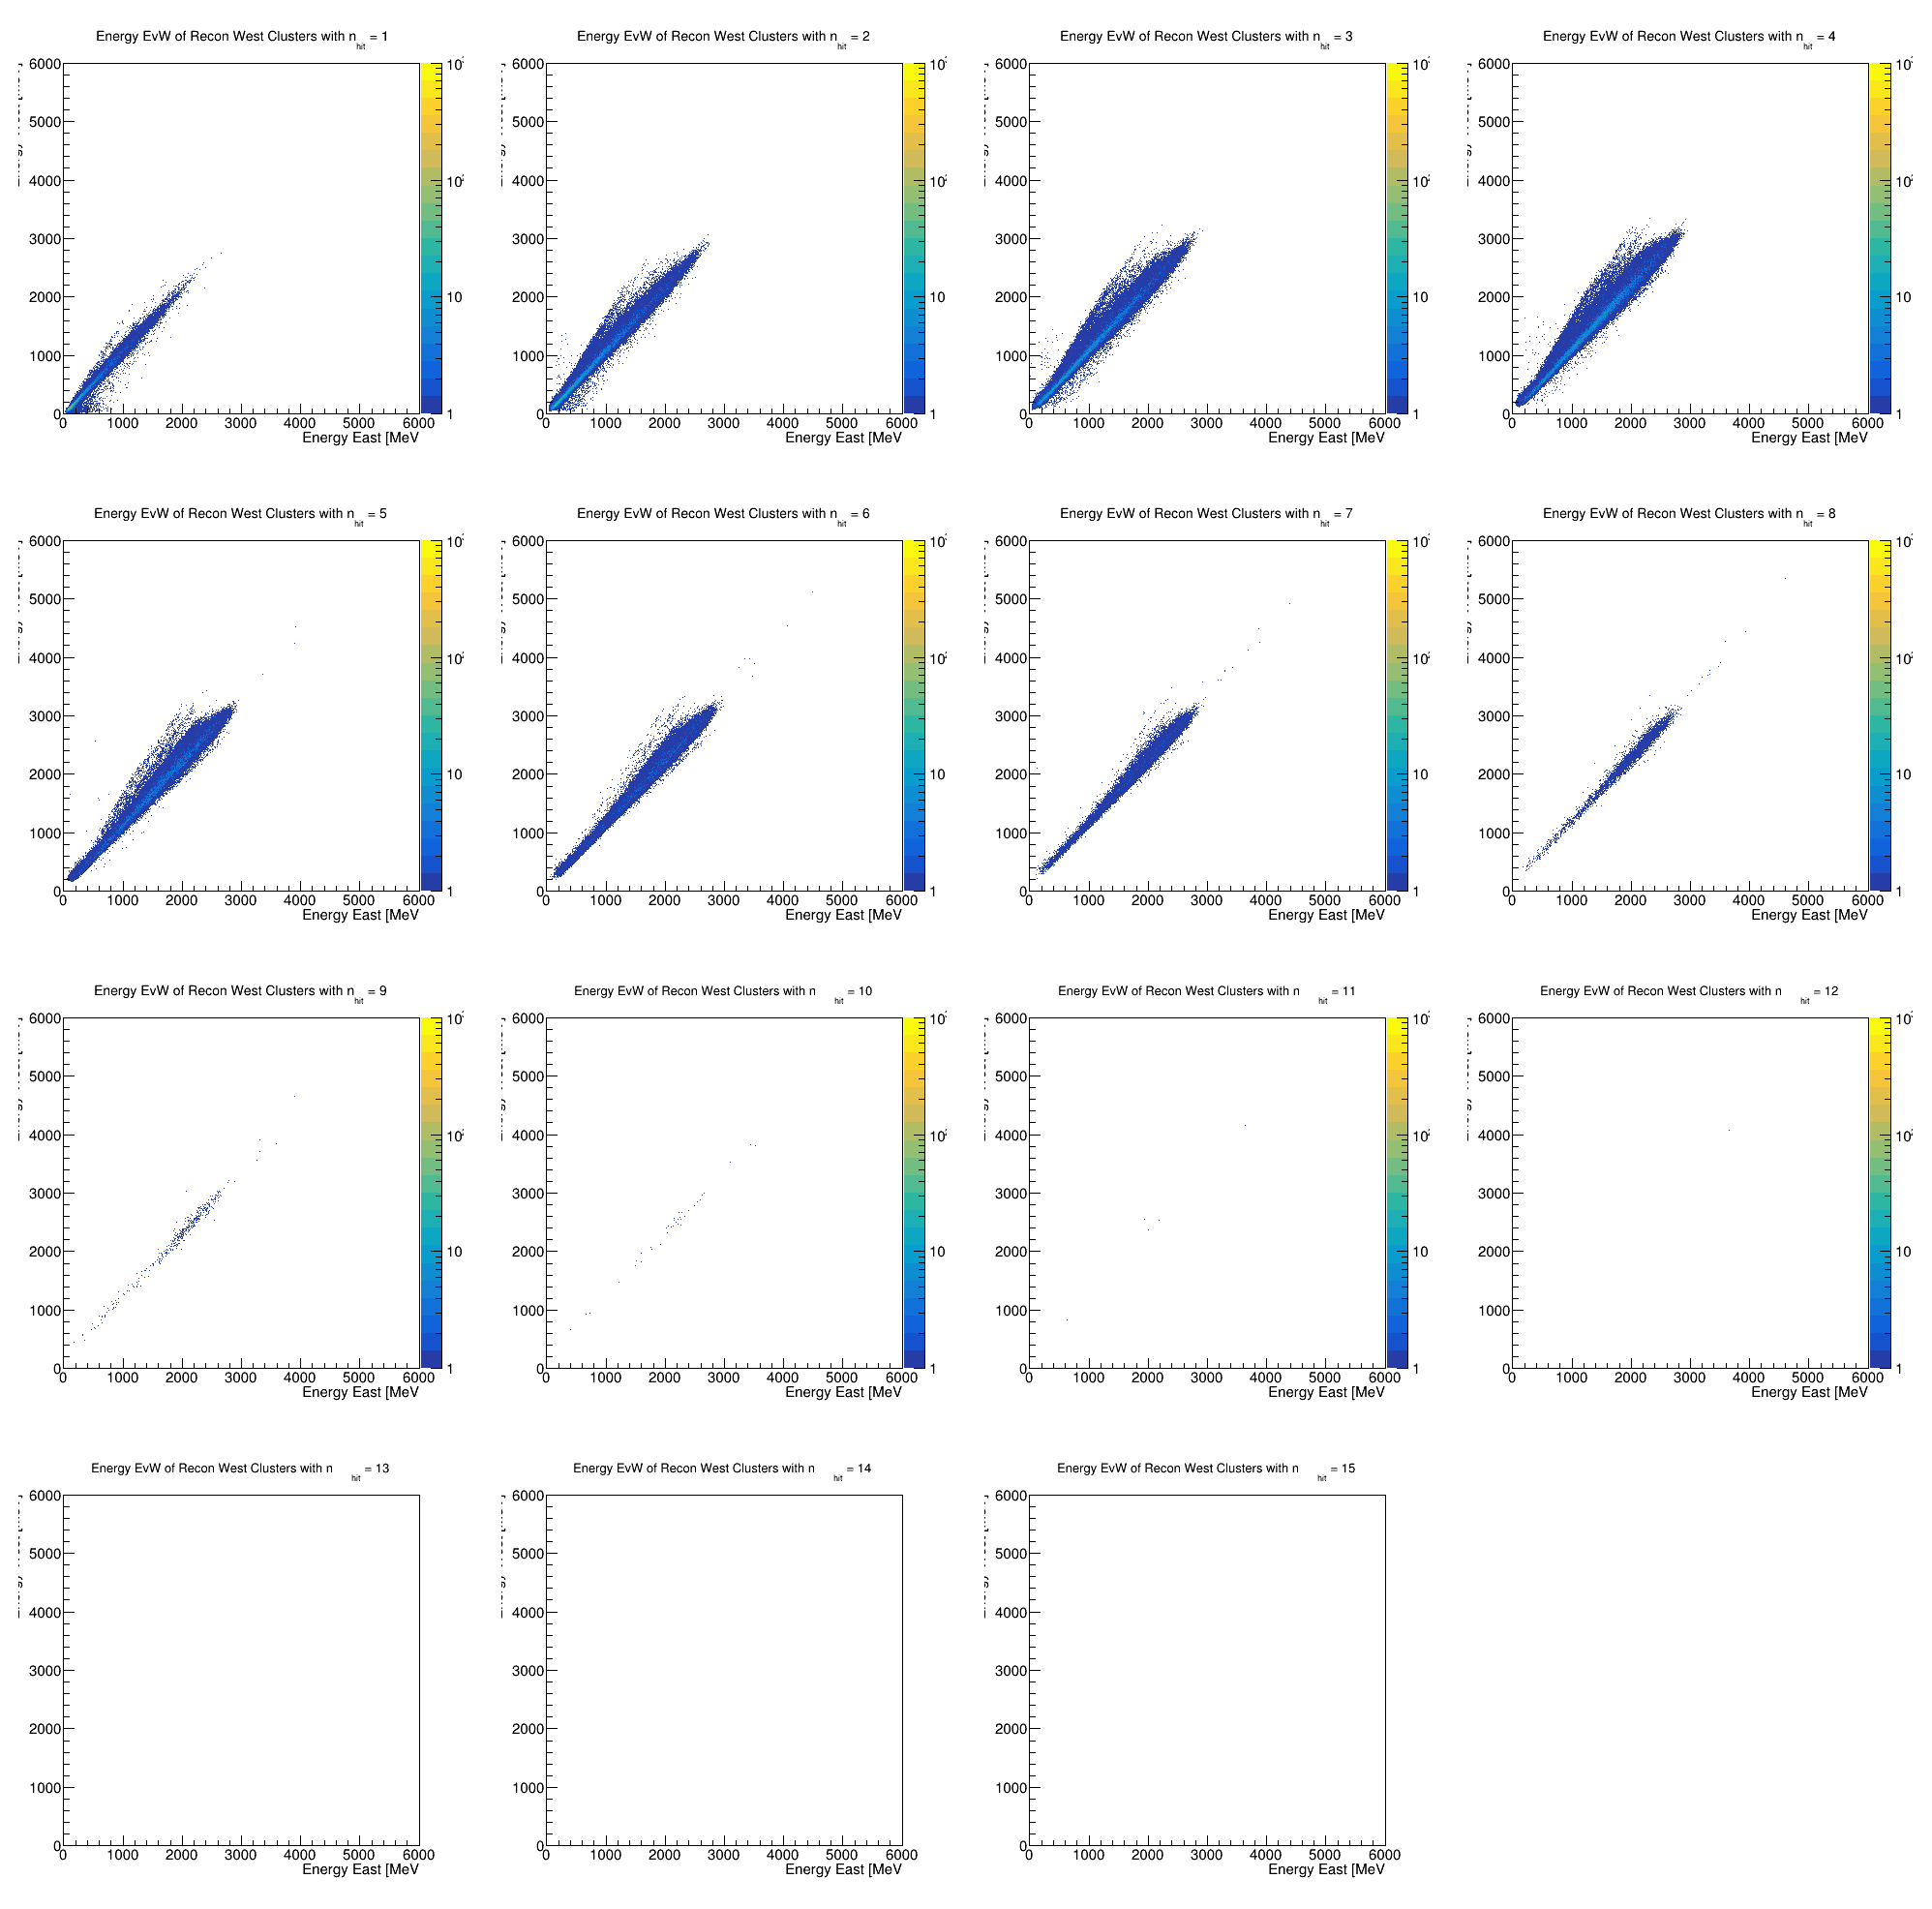

In [105]:
c = r.TCanvas("c","c",2000,2000)

c.Divide(4, int(np.ceil(len(evwVec)/4)))

slopeVec = []

for i, hi in enumerate(evwVec):
    c.cd(i+1)
    hi.SetLineColor(1)
    hi.SetFillColorAlpha(i+3,0.15)
    hi.GetZaxis().SetRangeUser(1,1000)
    hi.Draw("colz")
    r.gPad.SetLogz()
c.Draw()

In [102]:
slopeVec = []

for i, hi in enumerate(evwVec):
    func1 = r.TF1("func1","pol1",0,6000)
    func1.FixParameter(0,0)
    func1.SetParameter(1,0)
    
    if(hi.GetEntries() > 0):
        hi.Fit("func1","RQ")
        slopeVec.append(func1.GetParameter(1))
        
    func1.Delete()

Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of free parameters from FitConfig = 1
Number of free parameters from Minimizer = 2
Number of 

Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent

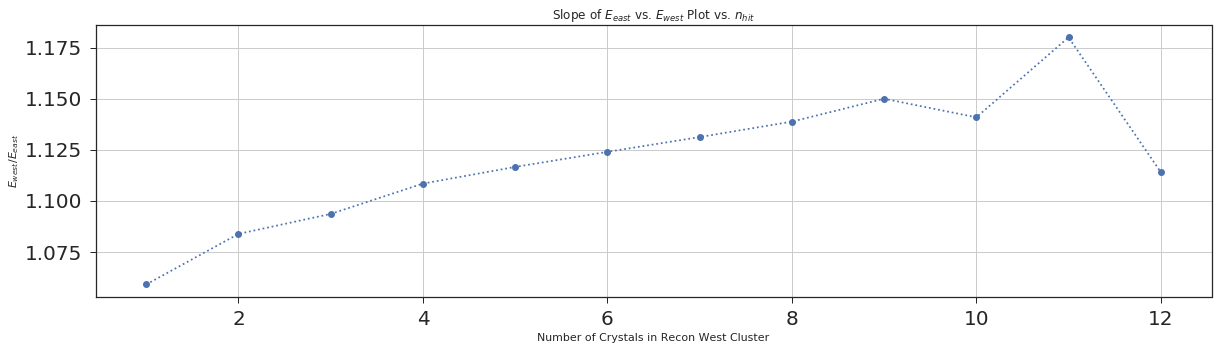

In [103]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot([i+1 for i in range(len(slopeVec))],slopeVec,"o:")
plt.title(r"Slope of $E_{east}$ vs. $E_{west}$ Plot vs. $n_{hit}$")
plt.xlabel("Number of Crystals in Recon West Cluster")
plt.ylabel(r"$E_{west} / E_{east}$")
plt.grid()
plt.show()

In [14]:
slopeVecByRun = []

for i, run in enumerate(set(runs)):
    print("Run:", run, "(",i+1,"/",len(set(runs)),")")
    slopeVeci = []
    for i in range(1,9):
        print("     nHit:", i)
        hi = r.TH2D("hi","Energy EvW of Recon West Clusters with n_{hit} = "+str(i)+"; Energy East [MeV; Energy West [MeV]"
                    ,6000,0,6000,6000,0,6000)
        tcomp.Draw("energyWest:energyEast>>hi","numberOfCrystalsWest == "+str(i)+" && runNum == "+str(run),"goff")
        
        func1 = r.TF1("func1","pol1",0,6000)
        func1.FixParameter(0,0)
        func1.SetParameter(1,0)

        if(hi.GetEntries() > 0):
            hi.Fit("func1","RQ")
            slopeVeci.append((run, i, func1.GetParameter(1), hi.GetEntries()))

        func1.Delete()
        hi.Delete()
    slopeVecByRun.append(slopeVeci)

Run: 15921 ( 1 / 40 )
     nHit: 1
     nHit: 2
     nHit: 3
     nHit: 4
     nHit: 5
     nHit: 6
     nHit: 7
     nHit: 8
Run: 15922 ( 2 / 40 )
     nHit: 1
     nHit: 2
     nHit: 3
     nHit: 4
     nHit: 5
     nHit: 6
     nHit: 7
     nHit: 8
Run: 15923 ( 3 / 40 )
     nHit: 1
     nHit: 2
     nHit: 3
     nHit: 4
     nHit: 5
     nHit: 6
     nHit: 7
     nHit: 8
Run: 15924 ( 4 / 40 )
     nHit: 1
     nHit: 2
     nHit: 3
     nHit: 4
     nHit: 5
     nHit: 6
     nHit: 7
     nHit: 8
Run: 15925 ( 5 / 40 )
     nHit: 1
     nHit: 2
     nHit: 3
     nHit: 4
     nHit: 5
     nHit: 6
     nHit: 7
     nHit: 8
Run: 15927 ( 6 / 40 )
     nHit: 1
     nHit: 2
     nHit: 3
     nHit: 4
     nHit: 5
     nHit: 6
     nHit: 7
     nHit: 8
Run: 15928 ( 7 / 40 )
     nHit: 1
     nHit: 2
     nHit: 3
     nHit: 4
     nHit: 5
     nHit: 6
     nHit: 7
     nHit: 8
Run: 15929 ( 8 / 40 )
     nHit: 1
     nHit: 2
     nHit: 3
     nHit: 4
     nHit: 5
     nHit: 6
     nHit: 7
     

Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <

In [15]:
print(slopeVecByRun)

[[(15921, 1, 1.0602662928684616, 10455.0), (15921, 2, 1.084803797079647, 20228.0), (15921, 3, 1.094598750636732, 20830.0), (15921, 4, 1.108329601960479, 25775.0), (15921, 5, 1.1176002126722941, 12792.0), (15921, 6, 1.1236732658038928, 3973.0), (15921, 7, 1.1323022742140252, 811.0), (15921, 8, 1.1411839072957055, 103.0)], [(15922, 1, 1.0604626656727976, 5273.0), (15922, 2, 1.0856362584339148, 9893.0), (15922, 3, 1.0935796541937035, 10363.0), (15922, 4, 1.1087406995032714, 13017.0), (15922, 5, 1.1174539692870948, 6225.0), (15922, 6, 1.1253314934980148, 1891.0), (15922, 7, 1.131042997714364, 393.0), (15922, 8, 1.1418190427295591, 54.0)], [(15923, 1, 1.0589063503049385, 10468.0), (15923, 2, 1.084725980046356, 19933.0), (15923, 3, 1.0938224672611303, 20357.0), (15923, 4, 1.1091480437290413, 25291.0), (15923, 5, 1.1169948625488126, 12310.0), (15923, 6, 1.1238466843260895, 3779.0), (15923, 7, 1.133567957859934, 783.0), (15923, 8, 1.1473533995812972, 84.0)], [(15924, 1, 1.0596696686538425, 213

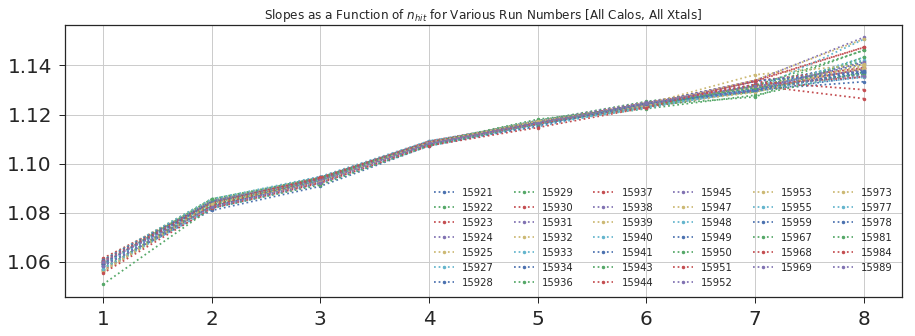

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
for slopei in slopeVecByRun:
    runi, indexi, slopeii, entriesi = zip(*slopei)
    plt.plot(indexi, slopeii,'.:', label=str(runi[0]))
plt.title(r"Slopes as a Function of $n_{hit}$ for Various Run Numbers [All Calos, All Xtals]")
plt.legend(ncol=6)
plt.grid()
plt.show()

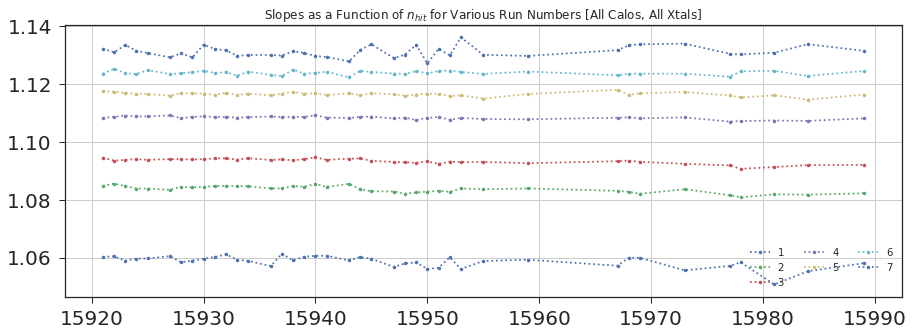

In [23]:
fig,ax = plt.subplots(figsize=(15,5))

ding = []

for slopei in slopeVecByRun:
    runi, indexi, slopeii, entriesi = zip(*slopei)
    ding.append(slopeii[0:7])

for i,dingi in enumerate(zip(*ding)):
    plt.plot(list(set(runs)),dingi,".:", label=str(i+1))    

plt.title(r"Slopes as a Function of $n_{hit}$ for Various Run Numbers [All Calos, All Xtals]")
plt.legend(ncol=3)
plt.grid()
plt.show()

In [11]:
evwVecByCalo = []
slopeVecByCalo = []

for calo in range(1,25):
    print("Calo:", calo)
    evwVeci = []
    slopeVeci = []
    for i in range(1,9):
        print("    Hits:", i)
        hi = r.TH2D("hi","Energy EvW of Recon West Clusters with n_{hit} = "+str(i)+"; Energy East [MeV; Energy West [MeV]"
                    ,3000,0,3000,3000,0,3000)
        tcomp.Draw("energyWest:energyEast>>hi","numberOfCrystalsWest == "+str(i)+" && caloNum == "+str(calo),"goff")
        
        func1 = r.TF1("func1","pol1",0,6000)
        func1.FixParameter(0,0)
        func1.SetParameter(1,0)

        if(hi.GetEntries() > 0):
            hi.Fit("func1","RQ")
            slopeVeci.append(func1.GetParameter(1))

        func1.Delete()
        hi.Delete()
    slopeVecByCalo.append(slopeVeci)

Calo: 1
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 2
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 3
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 4
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 5
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 6
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 7
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 8
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 9
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hits: 5
    Hits: 6
    Hits: 7
    Hits: 8
Calo: 10
    Hits: 1
    Hits: 2
    Hits: 3
    Hits: 4
    Hit

Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent

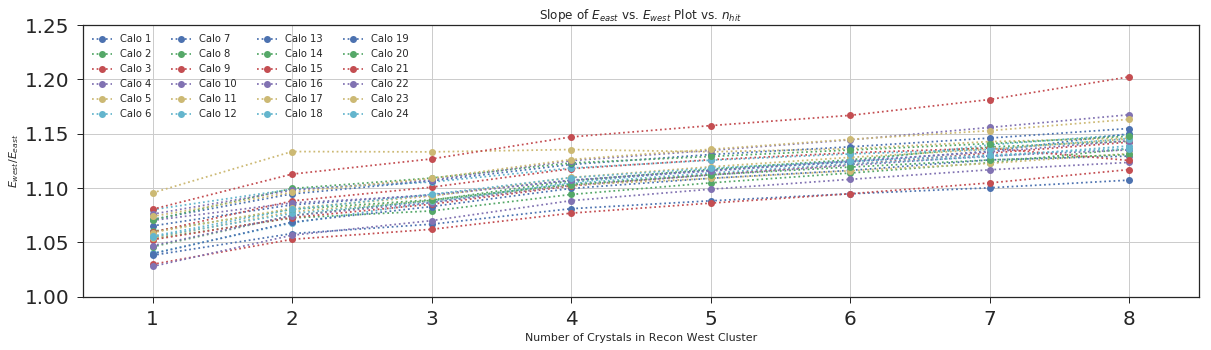

In [12]:
fig,ax = plt.subplots(figsize=(20,5))
for i, slopeVeci in enumerate(slopeVecByCalo):
    plt.plot([i+1 for i in range(len(slopeVeci))],slopeVeci,"o:", label='Calo '+str(i+1))
    
plt.title(r"Slope of $E_{east}$ vs. $E_{west}$ Plot vs. $n_{hit}$")
plt.xlabel("Number of Crystals in Recon West Cluster")
plt.ylabel(r"$E_{west} / E_{east}$")
plt.xlim(0.5,8.5)
plt.ylim(1,1.25)
plt.grid()
plt.legend(ncol=4)
plt.show()

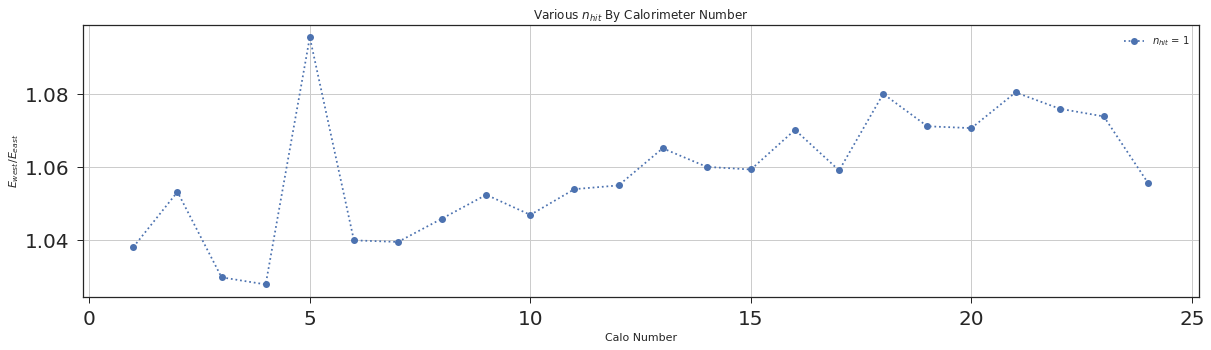

In [13]:
fig,ax = plt.subplots(figsize=(20,5))
for i,y in enumerate(zip(*slopeVecByCalo)):
    if(i < 1):
        plt.plot([x+1 for x in range(24)], y,"o:",label=r'$n_{hit}$ = '+str(i+1))
        
plt.title(r"Various $n_{hit}$ By Calorimeter Number")
plt.xlabel("Calo Number")
plt.ylabel(r"$E_{west} / E_{east}$")
plt.grid()
plt.legend(ncol=3)
plt.show()

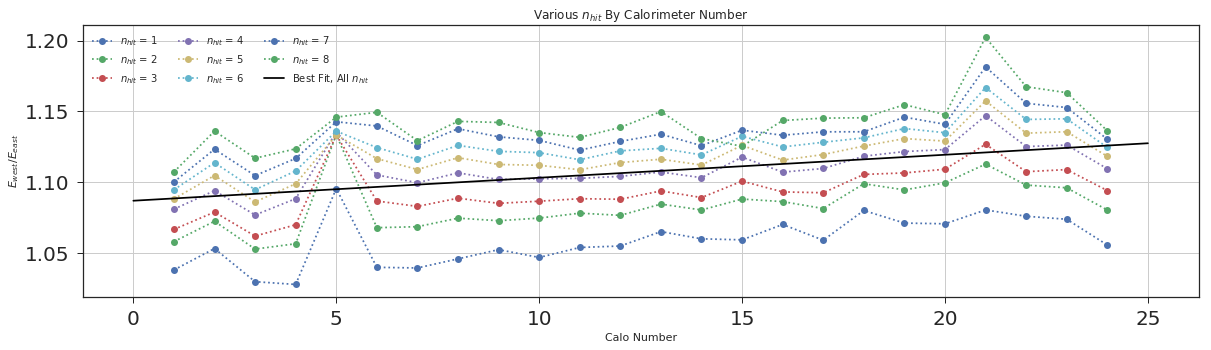

In [14]:
fig,ax = plt.subplots(figsize=(20,5))
for i,y in enumerate(zip(*slopeVecByCalo)):
    if(i < 8):
        plt.plot([x+1 for x in range(24)], y,"o:",label=r'$n_{hit}$ = '+str(i+1))
        
fitLine = [x*0.001622+1.087 for x in range(26)] #from the main comparison plots in another notebook
plt.plot(fitLine,"-",label=r'Best Fit, All $n_{hit}$',color='black')
        
plt.title(r"Various $n_{hit}$ By Calorimeter Number")
plt.xlabel("Calo Number")
plt.ylabel(r"$E_{west} / E_{east}$")
plt.grid()
plt.legend(ncol=3)
plt.show()